In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

#import pingouin as pg
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

%matplotlib inline 

from platform import python_version
print(python_version())

3.9.18


# Step 1: Pull census data at the census tract level

In [2]:
import censusdata

census_datapoints = {
 'B01003_001E': 'Total Pop',
 'B03002_003E': 'White Pop',
 'B03002_004E': 'Black Pop',
 'B03002_012E': 'Hispanic Pop',
 'B03002_006E': 'Asian Pop',
        
 'B01001_001E': 'Total Population',
 'B01001_002E': 'Male',
 
 'B19001_001E': 'Tot HHs',
 'B19001_002E': 'HH < 10K',
 'B19001_003E': '10k < HH < 15K',
 'B19001_004E': '15k < HH < 20K',
 'B19001_005E': '20k < HH < 25K',
 'B19001_006E': '25k < HH < 30K',
 'B19001_007E': '30k < HH < 35K',
 'B19001_008E': '35k < HH < 40K',
 'B19001_009E': '40k < HH < 45K',
 'B19001_010E': '45k < HH < 50K',
 'B19001_011E': '50k < HH < 60K',
 'B19001_012E': '60k < HH < 75K',
 'B19001_013E': '75k < HH < 100K',
 'B19001_014E': '100k < HH < 125K',
 'B19001_015E': '125k < HH < 150K',
 'B19001_016E': '150k < HH < 200K',
 'B19001_017E': '200k < HH',
 
 'B23025_005E': 'Unemployed Labor Force',
 'B23025_003E': 'Labor Force',
 
 'B06009_001E': 'Education Known',
 'B06009_002E': 'Less than HS',
 'B06009_003E': 'HS',
 'B06009_004E': 'Some College',
 'B06009_005E': 'College',
 'B06009_006E': 'Graduate',
 
 'B25003_001E': 'Houses',
 'B25003_002E': 'Owner-occupied houses',
 
 'B25109_001E': 'Median house price',

# ref: https://api.census.gov/data/2019/acs/acs5/groups/B27011.html
# update this section with this: https://data.census.gov/table/ACSDT5Y2019.B27010?q=B27010
# https://api.census.gov/data/2019/acs/acs5/groups/B27010.html
# private: "employer-based health insurance, direct-purchase health insurance"
# public: "medicare, medicaid, TRICARE, VA"    
 'B27010_018E': 'Insurance Denominator 19-34',   
 'B27010_034E': 'Insurance Denominator 35-64',   
    
 'B27010_020E': 'Employer Insurance 19-34',   
 'B27010_021E': 'Direct-purchase Insurance 19-34',   
 'B27010_022E': 'Medicare 19-34',   
 'B27010_023E': 'Medicaid 19-34',   
 'B27010_024E': 'TRICARE 19-34',   
 'B27010_025E': 'VA 19-34',   
 'B27010_027E': 'Employer and Direct-purchase 19-34',   
 'B27010_028E': 'Employer and Medicare 19-34',   
 'B27010_029E': 'Medicare and Medicaid 19-34',   
 'B27010_030E': 'Other Private-only Combo 19-34',   
 'B27010_031E': 'Other Public-only Combo 19-34',   
 'B27010_032E': 'Other Combo 19-34',   
    
 'B27010_036E': 'Employer Insurance 35-64',   
 'B27010_037E': 'Direct-purchase Insurance 35-64',   
 'B27010_038E': 'Medicare 35-64',   
 'B27010_039E': 'Medicaid 35-64',   
 'B27010_040E': 'TRICARE 35-64',   
 'B27010_041E': 'VA 35-64',   
 'B27010_043E': 'Employer and Direct-purchase 35-64',   
 'B27010_044E': 'Employer and Medicare 35-64',   
 'B27010_045E': 'Direct-purchase and Medicare 35-64',   
 'B27010_046E': 'Medicare and Medicaid 35-64',   
 'B27010_047E': 'Other Private-only Combo 35-64',   
 'B27010_048E': 'Other Public-only Combo 35-64',   
 'B27010_049E': 'Other Combo 35-64',   

 'B27010_033E': 'Uninsured 19-34',   
 'B27010_050E': 'Uninsured 35-64',  
    
# 'B01001_001E': 'Total Population',
 'B01001_003E': 'Under 18 1',
 'B01001_004E': 'Under 18 2',
 'B01001_005E': 'Under 18 3', 
 'B01001_006E': 'Under 18 4',
 'B01001_027E': 'Under 18 5',
 'B01001_028E': 'Under 18 6', 
 'B01001_029E': 'Under 18 7',
 'B01001_030E': 'Under 18 8',
    
 'B01001_007E': '18 - 39 1',
 'B01001_008E': '18 - 39 2',    
 'B01001_009E': '18 - 39 3',  
 'B01001_010E': '18 - 39 4',
 'B01001_011E': '18 - 39 5',    
 'B01001_012E': '18 - 39 6',    
 'B01001_013E': '18 - 39 7',  
 'B01001_031E': '18 - 39 8',
 'B01001_032E': '18 - 39 9',    
 'B01001_033E': '18 - 39 10',  
 'B01001_034E': '18 - 39 11',
 'B01001_035E': '18 - 39 12',    
 'B01001_036E': '18 - 39 13',    
 'B01001_037E': '18 - 39 14',
    
 'B01001_014E': '40 - 64 1',
 'B01001_015E': '40 - 64 2',    
 'B01001_016E': '40 - 64 3',  
 'B01001_017E': '40 - 64 4',
 'B01001_018E': '40 - 64 5',
 'B01001_019E': '40 - 64 6', 
 'B01001_038E': '40 - 64 7',    
 'B01001_039E': '40 - 64 8',    
 'B01001_040E': '40 - 64 9',  
 'B01001_041E': '40 - 64 10',
 'B01001_042E': '40 - 64 11',
 'B01001_043E': '40 - 64 12'#,
    
# 'B01001_020E': 'over 65 1',  
# 'B01001_021E': 'over 65 2',
# 'B01001_022E': 'over 65 3',    
# 'B01001_023E': 'over 65 4', 
# 'B01001_044E': 'over 65 5',  
# 'B01001_045E': 'over 65 6',
# 'B01001_046E': 'over 65 7',    
# 'B01001_047E': 'over 65 8'
 }
        

state_codes = [      '01', '02',       '04', '05', '06',       '08', '09',
               '10', '11', '12', '13',       '15', '16', '17', '18', '19', 
               '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
               '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
               '40', '41', '42',       '44', '45', '46', '47', '48', '49',
               '50', '51',       '53', '54', '55', '56'
              ]
    
state_data = []
for state in state_codes:
    state_data.append(censusdata.download('acs5', 2019, censusdata.censusgeo([('state', state) , 
                                        ('county', '*'),
                                         ('tract', '*')]), 
                                         list(census_datapoints.keys())))
df = pd.concat(state_data)
df['Census ID'] = df.index
df['Tract'] = df['Census ID'].apply(lambda x: str(x).split('tract:')[-1]) #.astype(int)
df['County Code'] = df['Census ID'].apply(lambda x: str(x).split('county:')[-1][:3])
df['State Code'] = df['Census ID'].apply(lambda x: str(x).split('state:')[-1][:2])
df['County'] = df['Census ID'].apply(lambda x: str(x).split(', ')[1][:-7])
df['State'] = df['Census ID'].apply(lambda x: str(x).split(', ')[2].split(':')[0])
df['GEOID'] = (df['State Code'] + df['County Code'] + df['Tract'].astype(str)).astype(int)
del df['Census ID']

In [3]:
#download the square mileage of each zip code

state_data = []
for state in state_codes:
    gazeteer_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2019_Gazetteer/2019_gaz_tracts_' + state + '.txt'
    census_tract_geometry = pd.read_table(gazeteer_url)
    state_data.append(census_tract_geometry)
    
df_geo = pd.concat(state_data)
df_geo.rename(columns={'ALAND_SQMI':'Square Miles'}, inplace=True)

df = pd.merge(df,df_geo[['GEOID', 'Square Miles']], on='GEOID')

df = df[df['Square Miles'] > 0]


In [4]:
# clean up

df = df.rename(columns=census_datapoints)

df['frac_female'] = 1 - df['Male'] / df['Total Population']

df['frac_white'] = df['White Pop'] / df['Total Pop']
df['frac_black'] = df['Black Pop'] / df['Total Pop']
df['frac_hispanic'] = df['Hispanic Pop'] / df['Total Pop']
df['frac_asian'] = df['Asian Pop'] / df['Total Pop']
df['frac_other'] = 1 - df.frac_white - df.frac_black - df.frac_hispanic - df.frac_asian

df['frac_under_18'] = (df['Under 18 1'] + df['Under 18 2'] + df['Under 18 3'] + df['Under 18 4'] + df['Under 18 5'] + df['Under 18 6'] + df['Under 18 7'] + df['Under 18 8']) / df['Total Population']
df['frac_18_to_39'] = (df['18 - 39 1'] + df['18 - 39 2'] + df['18 - 39 3'] + df['18 - 39 4'] + df['18 - 39 5'] + df['18 - 39 6'] + df['18 - 39 7'] + df['18 - 39 8'] + df['18 - 39 9'] + df['18 - 39 10'] + df['18 - 39 11'] + df['18 - 39 12'] + df['18 - 39 13'] + df['18 - 39 14']) / df['Total Population']
df['frac_40_to_64'] = (df['40 - 64 1'] + df['40 - 64 2'] + df['40 - 64 3'] + df['40 - 64 4'] + df['40 - 64 5'] + df['40 - 64 6'] + df['40 - 64 7'] + df['40 - 64 8'] + df['40 - 64 9'] + df['40 - 64 10'] + df['40 - 64 11'] + df['40 - 64 12']) / df['Total Population']
df['frac_over_65'] = 1 - df.frac_under_18 - df.frac_18_to_39 - df.frac_40_to_64 

#df['frac_lt_15k'] = (df['HH < 10K'] + df['10k < HH < 15K']) / df['Tot HHs']
#df['frac_15k_to_30k'] = (df['15k < HH < 20K'] + df['20k < HH < 25K'] + df['25k < HH < 30K']) / df['Tot HHs']
#df['frac_30k_to_45k'] = (df['30k < HH < 35K'] + df['35k < HH < 40K'] + df['40k < HH < 45K']) / df['Tot HHs']
#df['frac_45k_to_60k'] = (df['45k < HH < 50K'] + df['50k < HH < 60K']) / df['Tot HHs']
#df['frac_60k_to_100k'] = (df['60k < HH < 75K'] + df['75k < HH < 100K']) / df['Tot HHs']
#df['frac_100k_to_125k'] = (df['100k < HH < 125K'] ) / df['Tot HHs']
#df['frac_125k_to_200k'] = (df['125k < HH < 150K'] + df['150k < HH < 200K']) / df['Tot HHs']
#df['frac_gt_200k'] = (df['200k < HH']) / df['Tot HHs']

df['frac_lt_20k'] = (df['HH < 10K'] + df['10k < HH < 15K'] + df['15k < HH < 20K']) / df['Tot HHs']
df['frac_20k_to_40k'] = (df['20k < HH < 25K'] + df['25k < HH < 30K'] + df['30k < HH < 35K'] + df['35k < HH < 40K']) / df['Tot HHs']
df['frac_40k_to_75k'] = (df['40k < HH < 45K'] + df['45k < HH < 50K'] + df['50k < HH < 60K'] + df['60k < HH < 75K']) / df['Tot HHs']
df['frac_75k_to_125k'] = (df['75k < HH < 100K'] + df['100k < HH < 125K'] ) / df['Tot HHs']
df['frac_125k_to_200k'] = (df['125k < HH < 150K'] + df['150k < HH < 200K']) / df['Tot HHs']
df['frac_gt_200k'] = (df['200k < HH']) / df['Tot HHs']

df['frac_unemployed'] = df['Unemployed Labor Force'] / df['Labor Force']

df['frac_uninsured'] = (df['Uninsured 19-34'] + df['Uninsured 35-64'])/(df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])
df['frac_has_insurance'] =  1 - df['frac_uninsured']

df['private_insurance_19_34'] = (df['Employer Insurance 19-34'] + df['Direct-purchase Insurance 19-34'] + df['Employer and Direct-purchase 19-34'] + df['Employer and Medicare 19-34'] + df['Other Private-only Combo 19-34'] + df['Other Combo 19-34'])
df['private_insurance_35_64'] = (df['Employer Insurance 35-64'] + df['Direct-purchase Insurance 35-64'] + df['Employer and Direct-purchase 35-64'] + df['Employer and Medicare 35-64'] + df['Direct-purchase and Medicare 35-64'] + df['Other Private-only Combo 35-64'] + df['Other Combo 35-64'])
df['frac_private_insurance'] = (df['private_insurance_19_34'] + df['private_insurance_35_64']) / (df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])

df['public_insurance_19_34'] = (df['Medicare 19-34'] + df['Medicaid 19-34'] + df['TRICARE 19-34'] + df['VA 19-34'] + df['Employer and Medicare 19-34'] + df['Medicare and Medicaid 19-34'] + df['Other Public-only Combo 19-34'] + df['Other Combo 19-34'])
df['public_insurance_35_64'] = (df['Medicare 35-64'] + df['Medicaid 35-64'] + df['TRICARE 35-64'] + df['VA 35-64'] + df['Employer and Medicare 35-64'] + df['Direct-purchase and Medicare 35-64'] + df['Medicare and Medicaid 35-64'] + df['Other Public-only Combo 35-64'] + df['Other Combo 35-64'])
df['frac_public_insurance'] = (df['public_insurance_19_34'] + df['public_insurance_35_64']) / (df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])

df['frac_has_insurance_adtv'] = (df['private_insurance_19_34'] + df['private_insurance_35_64'] + df['public_insurance_19_34'] + df['public_insurance_35_64']) / (df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])

df['frac_lt_hs'] = df['Less than HS'] / df['Education Known']
df['frac_hs'] = df['HS'] / df['Education Known']
df['frac_some_college'] = df['Some College'] / df['Education Known']
df['frac_college'] = df['College'] / df['Education Known']
df['frac_graduate'] = df['Graduate'] / df['Education Known']

df['frac_houses_owner_occupied'] = df['Owner-occupied houses'] / df['Houses']

df['pop_density'] = df['Total Pop'] / df['Square Miles']

df['median_house_price'] = df['Median house price']

df = df[['GEOID', 'County Code', 'County', 'State Code', 'State', 'Square Miles',
     'Total Pop', 'pop_density','frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
     'frac_under_18', 'frac_18_to_39', 'frac_40_to_64', 'frac_over_65',
     'frac_lt_20k', 'frac_20k_to_40k', 'frac_40k_to_75k', 'frac_75k_to_125k',
     'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed',  'frac_uninsured', 'frac_has_insurance', 'frac_private_insurance',
     'frac_public_insurance', 'frac_has_insurance_adtv',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price']]

df.loc[df.median_house_price < 0, 'median_house_price'] = df.loc[df.median_house_price > 0, 'median_house_price'].min()

In [5]:
df[['frac_uninsured', 'frac_has_insurance_adtv', 'frac_has_insurance']]

,frac_uninsured,frac_has_insurance_adtv,frac_has_insurance
0,0.159545,0.877303,0.840455
1,0.285714,0.791667,0.714286
2,0.356416,0.707746,0.643584
3,0.137741,0.898684,0.862259
4,0.287928,0.775985,0.712072
...,...,...,...
73051,0.054976,1.007624,0.945024
73052,NaN,NaN,NaN
73053,0.168290,0.858664,0.831710
73054,0.120584,0.917569,0.879416


In [6]:
df_original = df.copy()

# Step 4: make a crosswalk file that matches counties to MarketScan's definition of MSA/EGEOLOG

In [7]:
xls = pd.ExcelFile('codes.xlsx')

xls.sheet_names

['pre-2014', 'post-2014', 'all FIPS codes', 'Decoding EGEOLOC']

In [8]:
df = pd.read_excel(xls, 'post-2014')
df=df[df.EGEOLOC != 1]
df['MSA'] = df['MSA'].astype(int)

df_xwalk = pd.read_excel('cbsa_2013.xls', header=2)
df_xwalk = df_xwalk.iloc[:-3, :].copy()
df_xwalk['CBSA Code'] = df_xwalk['CBSA Code'].astype(int)

In [9]:
#start with the ones that end with 0

df_temp = df[(df.MSA > 0) & (np.mod(df.MSA,10) == 0)].copy()
df_temp.shape

(417, 2)

In [10]:
df_state = pd.read_excel(xls, 'Decoding EGEOLOC')
df_temp = pd.merge(df_temp, df_state, on='EGEOLOC')
df_temp.shape

(417, 3)

In [11]:
df_temp = pd.merge(df_temp, df_xwalk, left_on = ['MSA', 'Label'], right_on = ['CBSA Code', 'State Name'])
df_temp.shape

(1055, 15)

In [12]:
#should be null 
df_temp[df_temp['Label'] != df_temp['State Name']][['Label', 'State Name']]

,Label,State Name


In [13]:
cols = ['MSA', 
        'EGEOLOC', 
        'State Name', 
        'FIPS State Code', 
        'FIPS County Code', 
        'County Name',
        'Metropolitan/Micropolitan Statistical Area', 
        'Central/Outlying County'
       ]

for col in ['FIPS State Code', 'FIPS County Code']:
    df_temp[col] = df_temp[col].astype(int)

df_temp['County Name'] = df_temp['County/County Equivalent']

df_temp = df_temp[cols].drop_duplicates()

In [14]:
df_ends_with_0 = df_temp.copy()

In [15]:
#Next do the the ones that end with 4

df_temp = df[(df.MSA > 0) & (np.mod(df.MSA,10) == 4)].copy()
df_temp.shape

(39, 2)

In [16]:
df_state = pd.read_excel(xls, 'Decoding EGEOLOC')
df_temp = pd.merge(df_temp, df_state, on='EGEOLOC')
df_temp.shape

(39, 3)

In [17]:
df_temp = pd.merge(df_temp, df_xwalk, left_on = ['MSA', 'Label'], right_on = ['Metro Division Code', 'State Name'])
df_temp.shape

(113, 15)

In [18]:
#should be null 
df_temp[df_temp['Label'] != df_temp['State Name']][['Label', 'State Name']]

,Label,State Name


In [19]:
cols = ['MSA', 
        'EGEOLOC', 
        'State Name', 
        'FIPS State Code', 
        'FIPS County Code', 
        'County Name',
        'Metropolitan/Micropolitan Statistical Area', 
        'Central/Outlying County'
       ]

for col in ['FIPS State Code', 'FIPS County Code']:
    df_temp[col] = df_temp[col].astype(int)

df_temp['County Name'] = df_temp['County/County Equivalent']

df_temp = df_temp[cols].drop_duplicates()

In [20]:
df_ends_with_4 = df_temp.copy()

In [21]:
df_ends_with_4

,MSA,EGEOLOC,State Name,FIPS State Code,FIPS County Code,County Name,Metropolitan/Micropolitan Statistical Area,Central/Outlying County
0,14454,6,Massachusetts,25,21,Norfolk County,Metropolitan Statistical Area,Central
1,14454,6,Massachusetts,25,23,Plymouth County,Metropolitan Statistical Area,Central
2,14454,6,Massachusetts,25,25,Suffolk County,Metropolitan Statistical Area,Central
3,15764,6,Massachusetts,25,9,Essex County,Metropolitan Statistical Area,Central
4,15764,6,Massachusetts,25,17,Middlesex County,Metropolitan Statistical Area,Central
...,...,...,...,...,...,...,...,...
108,41884,62,California,6,81,San Mateo County,Metropolitan Statistical Area,Central
109,42034,62,California,6,41,Marin County,Metropolitan Statistical Area,Central
110,42644,65,Washington,53,33,King County,Metropolitan Statistical Area,Central
111,42644,65,Washington,53,61,Snohomish County,Metropolitan Statistical Area,Central


In [22]:
#and finally, do all the ones that don't get matched anywhere

In [23]:
df_temp = pd.concat([df_ends_with_4, df_ends_with_0])
df_state_xwalk = df_temp[['EGEOLOC', 'FIPS State Code']].drop_duplicates()

df = pd.read_excel(xls, 'all FIPS codes')
df.shape

(3143, 8)

In [24]:
df_temp = pd.merge(df, df_temp, how='left', left_on = ['County FIPS Code', 'State FIPS Code'], right_on = ['FIPS County Code', 'FIPS State Code'])

In [25]:
df_msa_0 = pd.merge(df_temp[(df_temp.MSA.isna())][['County', 'County FIPS Code', 'State', 'State FIPS Code']],
                    df_state_xwalk, 
                    left_on = 'State FIPS Code',
                    right_on = 'FIPS State Code')
df_msa_0

,County,County FIPS Code,State,State FIPS Code,EGEOLOC,FIPS State Code
0,Barbour,5,Alabama,1,41,1
1,Bullock,11,Alabama,1,41,1
2,Butler,13,Alabama,1,41,1
3,Chambers,17,Alabama,1,41,1
4,Cherokee,19,Alabama,1,41,1
...,...,...,...,...,...,...
1970,Sweetwater,37,Wyoming,56,59,56
1971,Teton,39,Wyoming,56,59,56
1972,Uinta,41,Wyoming,56,59,56
1973,Washakie,43,Wyoming,56,59,56


In [26]:
df_msa_0['MSA'] = 0
df_msa_0['State Name'] = df_msa_0['State']
df_msa_0['County Name'] = df_msa_0['County']
df_msa_0['FIPS County Code'] = df_msa_0['County FIPS Code']
df_msa_0['Metropolitan/Micropolitan Statistical Area'] = 'Rural'
df_msa_0['Central/Outlying County'] = 'Rural'

df_msa_0 = df_msa_0[cols].copy()

In [27]:
df = pd.concat([df_ends_with_4, df_ends_with_0, df_msa_0]).reset_index()[cols]
df.to_csv('crosswalk_after_2014.csv')

# Step 5: roll up census data to MSA/State

In [28]:
df_crosswalk = pd.read_csv('crosswalk_after_2014.csv')

In [29]:
df_crosswalk

,Unnamed: 0,MSA,EGEOLOC,State Name,FIPS State Code,FIPS County Code,County Name,Metropolitan/Micropolitan Statistical Area,Central/Outlying County
0,0,14454,6,Massachusetts,25,21,Norfolk County,Metropolitan Statistical Area,Central
1,1,14454,6,Massachusetts,25,23,Plymouth County,Metropolitan Statistical Area,Central
2,2,14454,6,Massachusetts,25,25,Suffolk County,Metropolitan Statistical Area,Central
3,3,15764,6,Massachusetts,25,9,Essex County,Metropolitan Statistical Area,Central
4,4,15764,6,Massachusetts,25,17,Middlesex County,Metropolitan Statistical Area,Central
...,...,...,...,...,...,...,...,...,...
3138,3138,0,59,Wyoming,56,37,Sweetwater,Rural,Rural
3139,3139,0,59,Wyoming,56,39,Teton,Rural,Rural
3140,3140,0,59,Wyoming,56,41,Uinta,Rural,Rural
3141,3141,0,59,Wyoming,56,43,Washakie,Rural,Rural


In [30]:
df_crosswalk.groupby(['MSA', 'EGEOLOC']).size().describe()

count    503.000000
mean       6.248509
std       15.128792
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      172.000000
dtype: float64

In [31]:
# df here should be census data

In [32]:
df = df_original.copy()

In [33]:
df

,GEOID,County Code,County,State Code,State,Square Miles,Total Pop,pop_density,frac_female,frac_white,...,frac_private_insurance,frac_public_insurance,frac_has_insurance_adtv,frac_lt_hs,frac_hs,frac_some_college,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price
0,1073001100,073,Jefferson,01,Alabama,4.399,4781,1086.837918,0.600084,0.016105,...,0.655429,0.221874,0.877303,0.082192,0.229224,0.354642,0.247489,0.086454,0.565640,85500
1,1073001400,073,Jefferson,01,Alabama,0.865,1946,2249.710983,0.470709,0.000000,...,0.542517,0.249150,0.791667,0.174254,0.247253,0.407378,0.102041,0.069074,0.620098,67800
2,1073002000,073,Jefferson,01,Alabama,1.392,4080,2931.034483,0.574755,0.277451,...,0.444836,0.262911,0.707746,0.233405,0.304782,0.370093,0.068522,0.023198,0.376321,68400
3,1073003802,073,Jefferson,01,Alabama,1.253,5291,4222.665603,0.546589,0.016065,...,0.588307,0.310376,0.898684,0.143187,0.382794,0.391744,0.079388,0.002887,0.540655,64100
4,1073004000,073,Jefferson,01,Alabama,0.911,2533,2780.461032,0.530596,0.065930,...,0.348612,0.427372,0.775985,0.170472,0.347032,0.383562,0.054287,0.044647,0.261721,67300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73051,56021001902,021,Laramie,56,Wyoming,995.572,4187,4.205622,0.479818,0.932888,...,0.833066,0.174559,1.007624,0.010407,0.223415,0.430244,0.204553,0.131382,0.949337,345200
73052,56021980801,021,Laramie,56,Wyoming,1.386,0,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
73053,56025001602,025,Natrona,56,Wyoming,5.303,7513,1416.745239,0.488886,0.849594,...,0.766025,0.092639,0.858664,0.123694,0.245926,0.334308,0.197033,0.099039,0.691769,321700
73054,56025001603,025,Natrona,56,Wyoming,18.912,3724,196.912014,0.494629,0.832975,...,0.851154,0.066415,0.917569,0.033160,0.220535,0.343588,0.219337,0.183380,0.964805,334100


In [34]:
df['FIPS County Code'] = df['County Code'].astype(int)
df['FIPS State Code'] = df['State Code'].astype(int)

df_temp = pd.merge(df, df_crosswalk, on = ['FIPS State Code', 'FIPS County Code'])

In [35]:
#double check that distributions aren't that different after all this rolling up

In [36]:
df_temp

,GEOID,County Code,County,State Code,State,Square Miles,Total Pop,pop_density,frac_female,frac_white,...,median_house_price,FIPS County Code,FIPS State Code,Unnamed: 0,MSA,EGEOLOC,State Name,County Name,Metropolitan/Micropolitan Statistical Area,Central/Outlying County
0,1073001100,073,Jefferson,01,Alabama,4.399,4781,1086.837918,0.600084,0.016105,...,85500,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
1,1073001400,073,Jefferson,01,Alabama,0.865,1946,2249.710983,0.470709,0.000000,...,67800,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
2,1073002000,073,Jefferson,01,Alabama,1.392,4080,2931.034483,0.574755,0.277451,...,68400,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
3,1073003802,073,Jefferson,01,Alabama,1.253,5291,4222.665603,0.546589,0.016065,...,64100,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
4,1073004000,073,Jefferson,01,Alabama,0.911,2533,2780.461032,0.530596,0.065930,...,67300,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72730,56043000302,043,Washakie,56,Wyoming,5.957,2494,418.667114,0.516038,0.827586,...,182600,43,56,3141,0,59,Wyoming,Washakie,Rural,Rural
72731,56045951300,045,Weston,56,Wyoming,42.778,3755,87.778765,0.502264,0.985087,...,140100,45,56,3142,0,59,Wyoming,Weston,Rural,Rural
72732,56045951100,045,Weston,56,Wyoming,2355.227,3294,1.398591,0.438373,0.939284,...,216100,45,56,3142,0,59,Wyoming,Weston,Rural,Rural
72733,56031959100,031,Platte,56,Wyoming,882.685,1668,1.889689,0.495204,0.920264,...,155100,31,56,3135,0,59,Wyoming,Platte,Rural,Rural


In [37]:
#double check that distributions aren't that different after all this rolling up

In [38]:
sum_metrics = ['Total Pop', 'Square Miles']
average_metrics = [ 'frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
      'frac_under_18', 'frac_18_to_39', 'frac_40_to_64', 'frac_over_65',
     'frac_lt_20k', 'frac_20k_to_40k', 'frac_40k_to_75k', 'frac_75k_to_125k',
          'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed',  'frac_uninsured',
    'frac_has_insurance',
       'frac_private_insurance', 'frac_public_insurance',
       'frac_has_insurance_adtv',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price'
]

def rollup_sum(group, column):
    x = group[column]
    return (x).sum()

def rollup_avg(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum() /  w.sum()

df_msa = df_temp[['MSA', 'EGEOLOC']].drop_duplicates().reset_index()[['MSA', 'EGEOLOC']]

for column in sum_metrics:
    df_msa = pd.merge(df_msa, pd.DataFrame(df_temp.groupby(['MSA', 'EGEOLOC']).apply(rollup_sum, column), 
                               columns = [column]), on=['MSA', 'EGEOLOC'])
    
for column in average_metrics:
    df_msa = pd.merge(df_msa, pd.DataFrame(df_temp.groupby(['MSA', 'EGEOLOC']).apply(rollup_avg, column, 'Total Pop'), 
                               columns = [column]), on=['MSA', 'EGEOLOC'])

df_msa['pop_density'] = df_msa['Total Pop'] / df_msa['Square Miles']

In [39]:
df_state = df_crosswalk[['EGEOLOC', 'State Name']].drop_duplicates()

In [40]:
df_msa = pd.merge(df_msa, df_state, on='EGEOLOC')

In [41]:
df_msa

,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,...,frac_has_insurance_adtv,frac_lt_hs,frac_hs,frac_some_college,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price,pop_density,State Name
0,13820,41,1149440,5279.530,0.518941,0.635148,0.287359,0.044257,0.014080,0.019156,...,0.910509,0.113435,0.279621,0.304635,0.189712,0.112597,0.706577,178707.326959,217.716350,Alabama
1,20020,41,148252,1716.084,0.518765,0.698689,0.236469,0.033585,0.007366,0.023892,...,0.869889,0.158122,0.323161,0.324741,0.119341,0.074635,0.690969,126868.875968,86.389711,Alabama
2,0,41,1142642,28989.209,0.511897,0.685226,0.237991,0.047759,0.005439,0.023586,...,0.884927,0.188065,0.361280,0.295865,0.098014,0.056777,0.706991,106005.060893,39.416115,Alabama
3,19460,41,152271,1270.283,0.509644,0.758175,0.122335,0.070178,0.005418,0.043895,...,0.900906,0.170704,0.328268,0.300186,0.137079,0.063762,0.747711,127685.959900,119.871714,Alabama
4,17980,41,57952,641.170,0.519240,0.460657,0.434118,0.054908,0.008731,0.041586,...,0.919093,0.161687,0.313325,0.346039,0.115095,0.063855,0.607012,125800.405508,90.384765,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,29404,20,168524,271.844,0.505429,0.758278,0.072239,0.130711,0.015553,0.023219,...,0.945458,0.101363,0.302024,0.338259,0.166562,0.091792,0.663564,182258.310389,619.929077,Wisconsin
499,43100,20,115178,511.527,0.496735,0.842314,0.019240,0.063675,0.057138,0.017634,...,0.973399,0.068881,0.358055,0.322120,0.176108,0.074837,0.708739,158600.863012,225.165045,Wisconsin
500,0,59,402371,89062.304,0.488027,0.848163,0.005905,0.089905,0.008152,0.047876,...,0.869858,0.066667,0.294713,0.357353,0.179403,0.101865,0.712218,255273.056152,4.517860,Wyoming
501,16220,59,80333,5340.541,0.497815,0.866892,0.010755,0.084486,0.005801,0.032067,...,0.848224,0.075168,0.300880,0.394408,0.146665,0.082879,0.696780,220017.238246,15.042109,Wyoming


In [42]:
df_temp1 = df_msa[(df_msa.MSA != 0) & (np.mod(df_msa.MSA,10) == 0)][['MSA']].drop_duplicates()
df_temp2 = df_msa[(np.mod(df_msa.MSA,10) == 4)][['MSA']].drop_duplicates()
                                       
df_xwalk[df_xwalk['Metro Division Code'].isna()]

,CBSA Code,Metro Division Code,CSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Metropolitan Division Title,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,Central/Outlying County
0,10100,NaN,NaN,"Aberdeen, SD",Micropolitan Statistical Area,NaN,NaN,Brown County,South Dakota,46.0,13.0,Central
1,10100,NaN,NaN,"Aberdeen, SD",Micropolitan Statistical Area,NaN,NaN,Edmunds County,South Dakota,46.0,45.0,Outlying
2,10140,NaN,NaN,"Aberdeen, WA",Micropolitan Statistical Area,NaN,NaN,Grays Harbor County,Washington,53.0,27.0,Central
3,10180,NaN,NaN,"Abilene, TX",Metropolitan Statistical Area,NaN,NaN,Callahan County,Texas,48.0,59.0,Outlying
4,10180,NaN,NaN,"Abilene, TX",Metropolitan Statistical Area,NaN,NaN,Jones County,Texas,48.0,253.0,Outlying
...,...,...,...,...,...,...,...,...,...,...,...,...
1877,49700,NaN,472.0,"Yuba City, CA",Metropolitan Statistical Area,NaN,"Sacramento-Roseville, CA",Sutter County,California,6.0,101.0,Central
1878,49700,NaN,472.0,"Yuba City, CA",Metropolitan Statistical Area,NaN,"Sacramento-Roseville, CA",Yuba County,California,6.0,115.0,Central
1879,49740,NaN,NaN,"Yuma, AZ",Metropolitan Statistical Area,NaN,NaN,Yuma County,Arizona,4.0,27.0,Central
1880,49780,NaN,198.0,"Zanesville, OH",Micropolitan Statistical Area,NaN,"Columbus-Marion-Zanesville, OH",Muskingum County,Ohio,39.0,119.0,Central


In [43]:
df_t1 = pd.merge(df_temp1, df_xwalk[['CBSA Code', 'CBSA Title']], left_on = 'MSA', right_on = 'CBSA Code').rename(columns={'CBSA Title': 'Name'})
df_t2 = pd.merge(df_temp2, df_xwalk[['Metro Division Code', 'Metropolitan Division Title']], left_on = 'MSA', right_on = 'Metro Division Code').rename(columns={'Metropolitan Division Title': 'Name'})
df_names = pd.concat([df_t1[['MSA', 'Name']], df_t2[['MSA', 'Name']]])

In [44]:
df_msa_names = pd.merge(df_msa, df_names.drop_duplicates(), how='left', on = 'MSA')
df_msa_names.loc[df_msa_names.MSA == 0, 'Name'] = 'Rural'
# df_msa_names.to_csv('msa_census_2019.csv')

In [45]:
df_msa_names

,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,...,frac_lt_hs,frac_hs,frac_some_college,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price,pop_density,State Name,Name
0,13820,41,1149440,5279.530,0.518941,0.635148,0.287359,0.044257,0.014080,0.019156,...,0.113435,0.279621,0.304635,0.189712,0.112597,0.706577,178707.326959,217.716350,Alabama,"Birmingham-Hoover, AL"
1,20020,41,148252,1716.084,0.518765,0.698689,0.236469,0.033585,0.007366,0.023892,...,0.158122,0.323161,0.324741,0.119341,0.074635,0.690969,126868.875968,86.389711,Alabama,"Dothan, AL"
2,0,41,1142642,28989.209,0.511897,0.685226,0.237991,0.047759,0.005439,0.023586,...,0.188065,0.361280,0.295865,0.098014,0.056777,0.706991,106005.060893,39.416115,Alabama,Rural
3,19460,41,152271,1270.283,0.509644,0.758175,0.122335,0.070178,0.005418,0.043895,...,0.170704,0.328268,0.300186,0.137079,0.063762,0.747711,127685.959900,119.871714,Alabama,"Decatur, AL"
4,17980,41,57952,641.170,0.519240,0.460657,0.434118,0.054908,0.008731,0.041586,...,0.161687,0.313325,0.346039,0.115095,0.063855,0.607012,125800.405508,90.384765,Alabama,"Columbus, GA-AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,29404,20,168524,271.844,0.505429,0.758278,0.072239,0.130711,0.015553,0.023219,...,0.101363,0.302024,0.338259,0.166562,0.091792,0.663564,182258.310389,619.929077,Wisconsin,"Lake County-Kenosha County, IL-WI"
499,43100,20,115178,511.527,0.496735,0.842314,0.019240,0.063675,0.057138,0.017634,...,0.068881,0.358055,0.322120,0.176108,0.074837,0.708739,158600.863012,225.165045,Wisconsin,"Sheboygan, WI"
500,0,59,402371,89062.304,0.488027,0.848163,0.005905,0.089905,0.008152,0.047876,...,0.066667,0.294713,0.357353,0.179403,0.101865,0.712218,255273.056152,4.517860,Wyoming,Rural
501,16220,59,80333,5340.541,0.497815,0.866892,0.010755,0.084486,0.005801,0.032067,...,0.075168,0.300880,0.394408,0.146665,0.082879,0.696780,220017.238246,15.042109,Wyoming,"Casper, WY"


In [46]:
# export this after changing the insurance stuff
df_msa_names.to_csv('msa_census_2019_2023_10_28.csv')

# Second part of analysis

# -----------------------------------------------

# MarketScan PRCCSR Counts

In [47]:
df_census = pd.read_csv('msa_census_2019_2023_10_28.csv')
df_census.columns

Index(['Unnamed: 0', 'MSA', 'EGEOLOC', 'Total Pop', 'Square Miles',
       'frac_female', 'frac_white', 'frac_black', 'frac_hispanic',
       'frac_asian', 'frac_other', 'frac_under_18', 'frac_18_to_39',
       'frac_40_to_64', 'frac_over_65', 'frac_lt_20k', 'frac_20k_to_40k',
       'frac_40k_to_75k', 'frac_75k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_uninsured',
       'frac_has_insurance', 'frac_private_insurance', 'frac_public_insurance',
       'frac_has_insurance_adtv', 'frac_lt_hs', 'frac_hs', 'frac_some_college',
       'frac_college', 'frac_graduate', 'frac_houses_owner_occupied',
       'median_house_price', 'pop_density', 'State Name', 'Name'],
      dtype='object')

In [48]:
xls = pd.ExcelFile('MS_2019_procedure_counts_final.xlsx')
xls.sheet_names

['procedure_counts_18_64',
 'procedure_counts_0_17',
 'memdays_18_64',
 'memdays_0_17']

In [49]:
#df_counts = pd.read_excel('MarketScan_PCCRS_Inpatient_Counts_2019.xlsx')
#df_memdays = pd.read_excel(xls, 'mem_days')

df_counts = pd.read_excel(xls, 'procedure_counts_18_64')
df_memdays = pd.read_excel(xls, 'memdays_18_64')

In [50]:
for procedure in df_counts.PRCCSR.drop_duplicates():
    df_temp = df_counts[df_counts.PRCCSR == procedure].reset_index()
    proc_name = df_temp.PRCCSR_DESCRIPTION[0]
    df_memdays = pd.merge(df_memdays, df_temp[['MSA', 'EGEOLOC', 'num']], how='left', on=['MSA', 'EGEOLOC']).rename(columns={'num': proc_name})
    df_memdays[proc_name] = df_memdays[proc_name].fillna(0)/df_memdays.mem_days*36500

In [51]:
df_memdays

,MSA,EGEOLOC,mem_days,Colectomy,ENT repair,Episiotomy,Frenectomy,Skin graft,Thymectomy,Gastrectomy,...,Perineal muscle laceration repair (2nd degree obstetrical and other),Heart valve replacement and other valve procedures (non-endovascular),"Lower GI therapeutic procedures, NEC (excluding open and laparoscopic)",Placement of tunneled or implantable portion of a vascular access device,Peripheral nerve decompression (excluding lumbosacral and cervicothoracic),Angioplasty and related vessel procedures (endovascular; excluding carotid),"ENT excision (excluding nasal passage, sinuses, tongue, salivary glands, larynx)","Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells","Embolectomy, endarterectomy, and related vessel procedures (non-endovascular; excluding carotid)",Overall Inpatient Visits
0,30860.0,1,434629,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.083980,...,0.503878,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,4.870821
1,26820.0,1,787584,0.000000,0.0,0.139033,0.0,0.046344,0.0,0.000000,...,0.741508,0.000000,0.0,0.046344,0.0,0.046344,0.0,0.0,0.0,5.839377
2,21780.0,1,482950,0.000000,0.0,0.151154,0.0,0.000000,0.0,0.075577,...,0.226732,0.000000,0.0,0.000000,0.0,0.075577,0.0,0.0,0.0,6.650792
3,23580.0,1,406427,0.359228,0.0,0.089807,0.0,0.000000,0.0,0.000000,...,0.538842,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3.771895
4,14260.0,1,4082579,0.080464,0.0,0.035762,0.0,0.000000,0.0,0.026821,...,0.286094,0.017881,0.0,0.008940,0.0,0.008940,0.0,0.0,0.0,5.766575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,41980.0,97,133358,0.000000,0.0,0.547399,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,6.568785
561,41900.0,97,3771,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
562,38660.0,97,13146,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2.776510
563,NaN,97,365,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [52]:
df = pd.merge(df_census, df_memdays, on=['MSA', 'EGEOLOC'])
procedures = df.columns[38:]

In [53]:
df.columns[0:30]

Index(['Unnamed: 0', 'MSA', 'EGEOLOC', 'Total Pop', 'Square Miles',
       'frac_female', 'frac_white', 'frac_black', 'frac_hispanic',
       'frac_asian', 'frac_other', 'frac_under_18', 'frac_18_to_39',
       'frac_40_to_64', 'frac_over_65', 'frac_lt_20k', 'frac_20k_to_40k',
       'frac_40k_to_75k', 'frac_75k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_uninsured',
       'frac_has_insurance', 'frac_private_insurance', 'frac_public_insurance',
       'frac_has_insurance_adtv', 'frac_lt_hs', 'frac_hs',
       'frac_some_college'],
      dtype='object')

In [54]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [55]:
#this code does partial correlations controling for state

df_procs = pd.DataFrame([])
df_procs['procedure'] = procedures
temp = []
for pp in procedures:
    temp = temp + [(df[pp] * df.mem_days).sum() / df.mem_days.sum()]
df_procs['rate'] = temp

features = ['frac_white', 'frac_lt_40k', 'frac_college_plus', 'frac_40_to_64', 'median_house_price']

for feature in features:
    df_procs['corr_' + feature] = -999

for proc in procedures:
    df_temp = df[[proc, 'State Name', 'mem_days', 'frac_white', 'frac_40_to_64', 'frac_lt_20k', 'frac_20k_to_40k', 'frac_college','frac_graduate', 'median_house_price']].copy()
    df_temp['frac_lt_40k'] = df_temp.frac_lt_20k + df_temp.frac_20k_to_40k
    df_temp['frac_college_plus'] = df_temp.frac_college + df_temp.frac_graduate
    df_temp['phat'] = df_temp[proc].clip(lower = np.percentile(df_temp[df_temp[proc]>0][proc], 5),
                                     upper = np.percentile(df_temp[df_temp[proc]>0][proc], 95))
    df_temp['weight'] = df_temp['mem_days']/df_temp['phat']
    
    for feature in features:
        X = sm.add_constant(pd.get_dummies(df_temp['State Name']).iloc[:,:-1]).astype(int)
        y = df_temp[proc]
        weight = df_temp['weight']

        est = sm.WLS(y, X, weights=weight).fit() 
        resid_Optum = est.resid

        y = df_temp[feature]

        est = sm.WLS(y, X, weights = weight).fit() 
        resid_feature = est.resid

        df_procs.loc[df_procs.procedure == proc, 'corr_' + feature] = corr(resid_feature, resid_Optum, weight)

    
    

In [56]:
df_procs.sort_values(by='rate', ascending=False)#.to_csv('2019_MS_procedure_rates2.csv')#[0:20]

,procedure,rate,corr_frac_white,corr_frac_lt_40k,corr_frac_college_plus,corr_frac_40_to_64,corr_median_house_price
295,Overall Inpatient Visits,5.401322,0.049144,0.308227,-0.498917,-0.067508,-0.293428
122,Spontaneous vaginal delivery,0.863466,-0.188580,-0.261299,0.363271,-0.207333,0.312984
43,Cesarean section,0.469317,-0.426031,-0.242941,0.281683,0.038019,0.274592
92,Assisted vaginal delivery,0.396079,-0.061119,-0.203823,0.250627,0.011826,0.313888
286,Perineal muscle laceration repair (2nd degree ...,0.306903,-0.175923,-0.441427,0.588588,-0.002660,0.495570
...,...,...,...,...,...,...,...
154,"Peripheral nerve procedures, NEC",0.000850,-0.176691,-0.101640,0.115162,0.082786,0.176426
218,Spleen procedures (excluding splenectomy),0.000850,-0.146517,-0.129099,0.099499,0.138622,0.099970
102,Speech therapy evaluation,0.000825,-0.203097,-0.010304,0.019990,-0.014394,0.087238
98,"Lymphatic procedures, NEC",0.000785,-0.186609,-0.201156,0.156228,0.150542,0.175823


In [57]:
df_procs = pd.DataFrame([])
df_procs['procedure'] = procedures
temp = []
for pp in procedures:
    temp = temp + [(df[pp] * df.mem_days).sum() / df.mem_days.sum()]
df_procs['rate'] = temp

features = ['frac_white', 'frac_lt_40k', 'frac_college_plus']

for feature in features:
    df_procs['corr_' + feature] = -999

for proc in procedures:
    df_temp = df[[proc, 'State Name', 'mem_days', 'frac_white', 'frac_40_to_64', 'frac_lt_20k', 'frac_20k_to_40k', 'frac_college','frac_graduate']].copy()
    df_temp['frac_lt_40k'] = df_temp.frac_lt_20k + df_temp.frac_20k_to_40k
    df_temp['frac_college_plus'] = df_temp.frac_college + df_temp.frac_graduate
    df_temp['phat'] = df_temp[proc].clip(lower = np.percentile(df_temp[df_temp[proc]>0][proc], 5),
                                     upper = np.percentile(df_temp[df_temp[proc]>0][proc], 95))
    df_temp['weight'] =  df_temp['mem_days']/df_temp['phat']
    
    for feature in features:
        df_procs.loc[df_procs.procedure == proc, 'corr_' + feature] = corr(df_temp[proc], df_temp[feature], df_temp['weight'])

    

In [58]:
df_procs.sort_values(by='rate', ascending=False)[0:20]#.to_csv('2019_MS_procedure_rates.csv')

,procedure,rate,corr_frac_white,corr_frac_lt_40k,corr_frac_college_plus
295,Overall Inpatient Visits,5.401322,0.191529,0.466091,-0.490173
122,Spontaneous vaginal delivery,0.863466,-0.012664,-0.221502,0.241131
43,Cesarean section,0.469317,-0.398563,-0.053657,0.106080
92,Assisted vaginal delivery,0.396079,0.146186,-0.111411,0.118128
286,Perineal muscle laceration repair (2nd degree ...,0.306903,-0.069590,-0.469565,0.528282
136,Intravenous induction of labor,0.247837,0.152549,0.021427,0.005474
112,Fetal heart rate monitoring,0.206744,-0.089949,-0.063778,0.088022
200,Venous and arterial catheter placement,0.194811,-0.095244,0.353168,-0.342751
266,Perineal skin repair (1st degree obstetrical a...,0.187088,-0.170849,-0.316235,0.302272
224,Measurement during cardiac catheterization,0.138450,0.099741,0.494824,-0.466806


# Read in SID data

### remake this data with privately insured people (as a separate dataframe)

### remake this data with all insured people (as a separate dataframe)

In [59]:
df_pccrs = pd.read_excel('PRCCSR_classification.xlsx')

In [60]:
df_pccrs

,ICD-10-PCS,ICD-10-PCS DESCRIPTION,PRCCSR,PRCCSR DESCRIPTION,CLINICAL DOMAIN
0,0016070,Bypass Cerebral Ventricle to Nasopharynx with ...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
1,0016071,Bypass Cerebral Ventricle to Mastoid Sinus wit...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
2,0016072,Bypass Cerebral Ventricle to Atrium with Autol...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
3,0016073,Bypass Cerebral Ventricle to Blood Vessel with...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
4,0016074,Bypass Cerebral Ventricle to Pleural Cavity wi...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
...,...,...,...,...,...
81592,XXE97U7,"Measurement of Infection, Nasopharyngeal Fluid...",MAM015,"Measurement and monitoring, NEC",Measurement and Monitoring
81593,XXEBXQ6,"Measurement of Infection, Lower Respiratory Fl...",MAM014,Pulmonary function tests,Measurement and Monitoring
81594,XY0VX83,Extracorporeal Introduction of Endothelial Dam...,ADM021,"Administration of therapeutic substances, NEC",Administration of Therapeutic Substances
81595,XY0YX28,Extracorporeal Introduction of Taurolidine Ant...,ADM021,"Administration of therapeutic substances, NEC",Administration of Therapeutic Substances


In [61]:
df_temp = pd.read_csv('SID 2019 Data/SID_' + 'IA' + '_2019_Full.csv', low_memory=False)

In [62]:
df_temp.columns[201:250]

Index(['I10_PR44', 'I10_PR45', 'I10_PR46', 'I10_PR47', 'I10_PR48', 'I10_PR49',
       'I10_PR50', 'I10_PR51', 'I10_PR52', 'I10_PR53', 'I10_PR54', 'I10_PR55',
       'I10_PR56', 'I10_PR57', 'I10_PR58', 'I10_PR59', 'I10_PR60', 'I10_PR61',
       'I10_PROCTYPE', 'I10_SERVICELINE', 'KEY', 'LOS', 'LOS_X', 'MDC',
       'MDC_NoPOA', 'MDNUM1_R', 'MDNUM2_R', 'MDNUM3_R', 'MEDINCSTQ', 'MRN_R',
       'P7EDSRC_X', 'PAY1', 'PAY1_X', 'PAY2', 'PAY2_X', 'PAY3', 'PAY3_X',
       'PL_CBSA', 'PL_NCHS', 'PL_RUCC', 'PL_UIC', 'PL_UR_CAT4',
       'POA_Disch_Edit1', 'POA_Disch_Edit2', 'POA_Hosp_Edit1',
       'POA_Hosp_Edit2', 'POA_Hosp_Edit3', 'POA_Hosp_Edit3_Value', 'PRDAY1'],
      dtype='object')

PAY1 == 1 -> Medicare <br>
PAY1 == 2 -> Medicaid <br>
PAY1 == 3 -> Commercial <br>

In [63]:
df_temp[['MRN_R',
       'P7EDSRC_X', 'PAY1', 'PAY1_X', 'PAY2', 'PAY2_X', 'PAY3', 'PAY3_X',
       'PL_CBSA', 'PL_NCHS', 'PL_RUCC', 'PL_UIC', 'PL_UR_CAT4',
       'POA_Disch_Edit1', 'POA_Disch_Edit2', 'POA_Hosp_Edit1',
       'POA_Hosp_Edit2', 'POA_Hosp_Edit3', 'POA_Hosp_Edit3_Value', 'PRDAY1']]

,MRN_R,P7EDSRC_X,PAY1,PAY1_X,PAY2,PAY2_X,PAY3,PAY3_X,PL_CBSA,PL_NCHS,PL_RUCC,PL_UIC,PL_UR_CAT4,POA_Disch_Edit1,POA_Disch_Edit2,POA_Hosp_Edit1,POA_Hosp_Edit2,POA_Hosp_Edit3,POA_Hosp_Edit3_Value,PRDAY1
0,5823053,NaN,1,1,1.0,1.0,3.0,7.0,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,NaN
1,5613503,NaN,1,1,1.0,1.0,6.0,5.0,0.0,6.0,8.0,7.0,4.0,0.0,0.0,0,0,0,0.0,NaN
2,5164930,NaN,1,1,1.0,1.0,3.0,6.0,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,NaN
3,5152683,NaN,1,1,1.0,1.0,3.0,7.0,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,NaN
4,6611168,NaN,1,11,1.0,11.0,NaN,NaN,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329362,405792,NaN,1,1,3.0,7.0,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN
329363,778720,NaN,1,1,3.0,7.0,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN
329364,382074,NaN,3,6,NaN,NaN,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN
329365,104386,NaN,1,1,NaN,NaN,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN


In [64]:
df_temp[[s for s, s in enumerate(df_temp.columns) if 'CO' in s]]

,PSTCO,PSTCO_GEO
0,19061,19061.0
1,19043,19055.0
2,19061,19061.0
3,19061,19061.0
4,19061,19061.0
...,...,...
329362,19071,19071.0
329363,19071,19071.0
329364,19071,19071.0
329365,19071,19071.0


In [102]:
states = ['IA', 'NJ', 'MD', 'CA', 'MI']
state_names = ['Iowa', 'New Jersey', 'Maryland', 'California', 'Michigan']

cols = ['ZIP', 'PRCCSR', 'row_num']
df_counts = pd.DataFrame([], columns = cols)

for state in states:
    print(state)
    df_temp = pd.read_csv('SID 2019 Data/SID_' + state + '_2019_Full.csv', low_memory=False)
    proc_cols = [i for i, s in enumerate(df_temp.columns) if 'I10_PR' in s]
    loc_cols = [i for i, s in enumerate(df_temp.columns) if 'ZIP' in s]
    df_temp = df_temp[(pd.to_numeric(df_temp['AGE'], errors='coerce') <= 64)
                     &(pd.to_numeric(df_temp['AGE'], errors='coerce') >= 18)].iloc[:, proc_cols + loc_cols].copy()
    df_temp['row_num'] = df_temp.index
    
    df_procs = pd.DataFrame([], columns = cols)
    for proc_col in [s for i, s in enumerate(df_temp.columns) if 'I10_PR' in s and 'PROCTYPE' not in s]:
        df_tt = pd.merge(df_temp[[proc_col, 'ZIP', 'row_num']], df_pccrs, left_on = proc_col, right_on = 'ICD-10-PCS')
        df_procs = pd.concat([df_procs, df_tt[cols]])
    df_counts = pd.concat([df_counts, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])

    df_tot_hosps = pd.DataFrame(df_temp.groupby('ZIP').size()).rename(columns={0:'count'}).reset_index()
    df_tot_hosps['PRCCSR'] = 'XXX'
    df_tot_hosps['row_num'] = np.nan
    df_counts = pd.concat([df_counts, df_tot_hosps])
    
df_counts = df_counts.groupby(['ZIP', 'PRCCSR'])['count'].sum().reset_index()

IA
NJ
MD
CA
MI


In [ ]:
# repeat the above for those with commercial insurance

states = ['IA', 'NJ', 'MD', 'CA', 'MI']
state_names = ['Iowa', 'New Jersey', 'Maryland', 'California', 'Michigan']

cols = ['ZIP', 'PRCCSR', 'row_num']
df_counts_com_insured = pd.DataFrame([], columns = cols)

for state in states:
    print(state)
    df_temp = pd.read_csv('SID 2019 Data/SID_' + state + '_2019_Full.csv', low_memory=False)
    df_temp['PAY1'] = pd.to_numeric(df_temp['PAY1'], errors='coerce')
    df_temp = df_temp[df_temp['PAY1'] == 3]
    proc_cols = [i for i, s in enumerate(df_temp.columns) if 'I10_PR' in s]
    loc_cols = [i for i, s in enumerate(df_temp.columns) if 'ZIP' in s]
    df_temp = df_temp[(pd.to_numeric(df_temp['AGE'], errors='coerce') <= 64)
                     &(pd.to_numeric(df_temp['AGE'], errors='coerce') >= 18)].iloc[:, proc_cols + loc_cols].copy()
    df_temp['row_num'] = df_temp.index
    
    df_procs = pd.DataFrame([], columns = cols)
    for proc_col in [s for i, s in enumerate(df_temp.columns) if 'I10_PR' in s and 'PROCTYPE' not in s]:
        df_tt = pd.merge(df_temp[[proc_col, 'ZIP', 'row_num']], df_pccrs, left_on = proc_col, right_on = 'ICD-10-PCS')
        df_procs = pd.concat([df_procs, df_tt[cols]])
    df_counts_com_insured = pd.concat([df_counts_com_insured, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])

    df_tot_hosps = pd.DataFrame(df_temp.groupby('ZIP').size()).rename(columns={0:'count'}).reset_index()
    df_tot_hosps['PRCCSR'] = 'XXX'
    df_tot_hosps['row_num'] = np.nan
    df_counts_com_insured = pd.concat([df_counts_com_insured, df_tot_hosps])
    
df_counts_com_insured = df_counts_com_insured.groupby(['ZIP', 'PRCCSR'])['count'].sum().reset_index()

In [ ]:
# repeat the above for those with any insurance

states = ['IA', 'NJ', 'MD', 'CA', 'MI']
state_names = ['Iowa', 'New Jersey', 'Maryland', 'California', 'Michigan']

cols = ['ZIP', 'PRCCSR', 'row_num']
df_counts_insured = pd.DataFrame([], columns = cols)

for state in states:
    print(state)
    df_temp = pd.read_csv('SID 2019 Data/SID_' + state + '_2019_Full.csv', low_memory=False)
    df_temp['PAY1'] = pd.to_numeric(df_temp['PAY1'], errors='coerce')
    df_temp = df_temp[(df_temp['PAY1'] == 1) | (df_temp['PAY1'] == 2) | (df_temp['PAY1'] == 3)]
    proc_cols = [i for i, s in enumerate(df_temp.columns) if 'I10_PR' in s]
    loc_cols = [i for i, s in enumerate(df_temp.columns) if 'ZIP' in s]
    df_temp = df_temp[(pd.to_numeric(df_temp['AGE'], errors='coerce') <= 64)
                     &(pd.to_numeric(df_temp['AGE'], errors='coerce') >= 18)].iloc[:, proc_cols + loc_cols].copy()
    df_temp['row_num'] = df_temp.index
    
    df_procs = pd.DataFrame([], columns = cols)
    for proc_col in [s for i, s in enumerate(df_temp.columns) if 'I10_PR' in s and 'PROCTYPE' not in s]:
        df_tt = pd.merge(df_temp[[proc_col, 'ZIP', 'row_num']], df_pccrs, left_on = proc_col, right_on = 'ICD-10-PCS')
        df_procs = pd.concat([df_procs, df_tt[cols]])
    df_counts_insured = pd.concat([df_counts_insured, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])

    df_tot_hosps = pd.DataFrame(df_temp.groupby('ZIP').size()).rename(columns={0:'count'}).reset_index()
    df_tot_hosps['PRCCSR'] = 'XXX'
    df_tot_hosps['row_num'] = np.nan
    df_counts_insured = pd.concat([df_counts_insured, df_tot_hosps])
    
df_counts_insured = df_counts_insured.groupby(['ZIP', 'PRCCSR'])['count'].sum().reset_index()

## ----------------------------------------------------------------

### investigate what's going on with CA (and NJ) -- continue here from Oct 29

In [ ]:
states = ['IA']
state_names = ['Iowa']

cols = ['ZIP', 'PRCCSR', 'row_num']
df_counts_ia = pd.DataFrame([], columns = cols)

In [ ]:
df_ia = pd.read_csv('SID 2019 Data/SID_' + 'IA' + '_2019_Full.csv', low_memory=False)

In [ ]:
df_ia

In [ ]:
df_ca.groupby('PAY1')['PAY1'].count()

In [ ]:
df_ca['PAY1'] = pd.to_numeric(df_ca['PAY1'], errors='coerce')

In [ ]:
df_ca_insured = df_ca[(df_ca['PAY1'] == 1) | (df_ca['PAY1'] == 2) | (df_ca['PAY1'] == 3)]

In [ ]:
df_ca_insured.groupby('PAY1')['PAY1'].count()

In [ ]:

for state in states:
    print(state)
    df_temp = pd.read_csv('SID 2019 Data/SID_' + state + '_2019_Full.csv', low_memory=False)
    df_temp = df_temp[(df_temp['PAY1'] == 1) | (df_temp['PAY1'] == 2) | (df_temp['PAY1'] == 3)].copy()
    proc_cols = [i for i, s in enumerate(df_temp.columns) if 'I10_PR' in s]
    loc_cols = [i for i, s in enumerate(df_temp.columns) if 'ZIP' in s]
    df_temp = df_temp[(pd.to_numeric(df_temp['AGE'], errors='coerce') <= 64)
                     &(pd.to_numeric(df_temp['AGE'], errors='coerce') >= 18)].iloc[:, proc_cols + loc_cols].copy()
    df_temp['row_num'] = df_temp.index
    
    df_procs = pd.DataFrame([], columns = cols)
    for proc_col in [s for i, s in enumerate(df_temp.columns) if 'I10_PR' in s and 'PROCTYPE' not in s]:
        df_tt = pd.merge(df_temp[[proc_col, 'ZIP', 'row_num']], df_pccrs, left_on = proc_col, right_on = 'ICD-10-PCS')
        df_procs = pd.concat([df_procs, df_tt[cols]])
    df_counts_insured = pd.concat([df_counts_insured, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])

    df_tot_hosps = pd.DataFrame(df_temp.groupby('ZIP').size()).rename(columns={0:'count'}).reset_index()
    df_tot_hosps['PRCCSR'] = 'XXX'
    df_tot_hosps['row_num'] = np.nan
    df_counts_insured = pd.concat([df_counts_insured, df_tot_hosps])
    
df_counts_insured = df_counts_insured.groupby(['ZIP', 'PRCCSR'])['count'].sum().reset_index()

## ----------------------------------------------------------------

### check counts to see differences

In [ ]:
df_counts

In [ ]:
df_counts_insured

In [ ]:
df_counts_com_insured

In [ ]:
# save files so don't have to re-run code above
df_counts.to_csv('sid_counts_oct19.csv')

In [ ]:
df_counts_insured.to_csv('sid_counts_insured_oct19.csv')

In [ ]:
df_counts_com_insured.to_csv('sid_counts_insured_commercial_oct19.csv')

In [ ]:
df_temp.columns

In [ ]:
df_tt = pd.merge(df_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_tt.loc[df_tt.PRCCSR == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_tt['ZIP'] = pd.to_numeric(df_tt['ZIP'], errors='coerce')
df_tt = df_tt[~df_tt.ZIP.isna()].copy()
df_tt['ZIP'] = df_tt['ZIP'].astype(int)
df_tt.to_csv('SID_zip_counts_oct19.csv')

In [ ]:
df_crosswalk = pd.read_excel('ZIP_COUNTY_122019.xlsx')

df_counts['ZIP'] = pd.to_numeric(df_counts['ZIP'], errors='coerce')
df_counts = df_counts[~df_counts.ZIP.isna()].copy()
df_counts['ZIP'] = df_counts['ZIP'].astype(int)

df_tt = pd.merge(df_counts, df_crosswalk, on='ZIP')
df_tt['count_adjusted'] = df_tt['count'] * df_tt['RES_RATIO']

In [ ]:
df_sid_county = pd.DataFrame(df_tt.groupby(['COUNTY', 'PRCCSR'])['count_adjusted'].sum()).rename(columns={'count_adjusted': 'count'}).reset_index()
df_sid_county['FIPS State Code'] = np.floor(df_sid_county['COUNTY']/1000).astype(int)
df_sid_county['FIPS County Code'] = np.mod(df_sid_county['COUNTY'],1000).astype(int)

In [ ]:
df_msa_x = pd.read_csv('crosswalk_after_2014.csv')

df_stage = pd.merge(df_msa_x, df_sid_county[['FIPS State Code', 'FIPS County Code', 'PRCCSR', 'count']],
        how='left', on = ['FIPS State Code', 'FIPS County Code'])
df_sid_counts = df_stage.groupby(['MSA', 'EGEOLOC', 'State Name', 'PRCCSR'])['count'].sum().reset_index()

In [ ]:
df_sid_counts = df_sid_counts[df_sid_counts['State Name'].isin(state_names)].copy()
df_sid_counts = pd.merge(df_sid_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_sid_counts.loc[df_sid_counts['PRCCSR'] == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_sid_counts.to_csv('sid_2019_msa_counts_oct19.csv')

## repeat above for insured cohort

In [ ]:
df_tt = pd.merge(df_counts_insured, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_tt.loc[df_tt.PRCCSR == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_tt['ZIP'] = pd.to_numeric(df_tt['ZIP'], errors='coerce')
df_tt = df_tt[~df_tt.ZIP.isna()].copy()
df_tt['ZIP'] = df_tt['ZIP'].astype(int)
df_tt.to_csv('SID_zip_counts_insured_oct19.csv')

In [ ]:
df_crosswalk = pd.read_excel('ZIP_COUNTY_122019.xlsx')

df_counts_insured['ZIP'] = pd.to_numeric(df_counts_insured['ZIP'], errors='coerce')
df_counts_insured = df_counts_insured[~df_counts_insured.ZIP.isna()].copy()
df_counts_insured['ZIP'] = df_counts_insured['ZIP'].astype(int)

df_tt = pd.merge(df_counts_insured, df_crosswalk, on='ZIP')
df_tt['count_adjusted'] = df_tt['count'] * df_tt['RES_RATIO']

In [ ]:
df_sid_county = pd.DataFrame(df_tt.groupby(['COUNTY', 'PRCCSR'])['count_adjusted'].sum()).rename(columns={'count_adjusted': 'count'}).reset_index()
df_sid_county['FIPS State Code'] = np.floor(df_sid_county['COUNTY']/1000).astype(int)
df_sid_county['FIPS County Code'] = np.mod(df_sid_county['COUNTY'],1000).astype(int)

In [ ]:
df_msa_x = pd.read_csv('crosswalk_after_2014.csv')

df_stage = pd.merge(df_msa_x, df_sid_county[['FIPS State Code', 'FIPS County Code', 'PRCCSR', 'count']],
        how='left', on = ['FIPS State Code', 'FIPS County Code'])
df_sid_counts = df_stage.groupby(['MSA', 'EGEOLOC', 'State Name', 'PRCCSR'])['count'].sum().reset_index()

In [ ]:
df_sid_counts = df_sid_counts[df_sid_counts['State Name'].isin(state_names)].copy()
df_sid_counts = pd.merge(df_sid_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_sid_counts.loc[df_sid_counts['PRCCSR'] == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_sid_counts.to_csv('sid_2019_msa_counts_insured_oct19.csv')

## repeat above for commercially insured cohort

In [ ]:
df_tt = pd.merge(df_counts_com_insured, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_tt.loc[df_tt.PRCCSR == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_tt['ZIP'] = pd.to_numeric(df_tt['ZIP'], errors='coerce')
df_tt = df_tt[~df_tt.ZIP.isna()].copy()
df_tt['ZIP'] = df_tt['ZIP'].astype(int)
df_tt.to_csv('SID_zip_counts_insured_commercial_oct19.csv')

In [ ]:
df_crosswalk = pd.read_excel('ZIP_COUNTY_122019.xlsx')

df_counts_com_insured['ZIP'] = pd.to_numeric(df_counts_com_insured['ZIP'], errors='coerce')
df_counts_com_insured = df_counts_com_insured[~df_counts_com_insured.ZIP.isna()].copy()
df_counts_com_insured['ZIP'] = df_counts_com_insured['ZIP'].astype(int)

df_tt = pd.merge(df_counts_com_insured, df_crosswalk, on='ZIP')
df_tt['count_adjusted'] = df_tt['count'] * df_tt['RES_RATIO']

In [ ]:
df_sid_county = pd.DataFrame(df_tt.groupby(['COUNTY', 'PRCCSR'])['count_adjusted'].sum()).rename(columns={'count_adjusted': 'count'}).reset_index()
df_sid_county['FIPS State Code'] = np.floor(df_sid_county['COUNTY']/1000).astype(int)
df_sid_county['FIPS County Code'] = np.mod(df_sid_county['COUNTY'],1000).astype(int)

In [ ]:
df_msa_x = pd.read_csv('crosswalk_after_2014.csv')

df_stage = pd.merge(df_msa_x, df_sid_county[['FIPS State Code', 'FIPS County Code', 'PRCCSR', 'count']],
        how='left', on = ['FIPS State Code', 'FIPS County Code'])
df_sid_counts = df_stage.groupby(['MSA', 'EGEOLOC', 'State Name', 'PRCCSR'])['count'].sum().reset_index()

In [ ]:
df_sid_counts = df_sid_counts[df_sid_counts['State Name'].isin(state_names)].copy()
df_sid_counts = pd.merge(df_sid_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_sid_counts.loc[df_sid_counts['PRCCSR'] == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_sid_counts.to_csv('sid_2019_msa_counts_insured_commercial_oct19.csv')

# compare SID to MarketScan

In [65]:
df_sid_counts = pd.read_csv('sid_2019_msa_counts_oct19.csv')
df_sid_counts_insured = pd.read_csv('sid_2019_msa_counts_insured_oct19.csv')
df_sid_counts_commercial = pd.read_csv('sid_2019_msa_counts_insured_commercial_oct19.csv')

In [66]:
df_sid_counts

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,0,0,18,Michigan,ADM001,2925.782615,Transfusion of blood and blood products
1,1,0,18,Michigan,ADM002,434.281337,Transfusion of plasma
2,2,0,18,Michigan,ADM003,62.575625,Administration of albumin and globulin
3,3,0,18,Michigan,ADM004,20.413022,Transfusion of clotting factors
4,4,0,18,Michigan,ADM005,366.612462,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...
21991,21991,49700,62,California,URN009,7.835593,Cystectomy (including fulguration) and urethre...
21992,21992,49700,62,California,URN010,2.833333,Urinary diversion with anastomosis or ostomy
21993,21993,49700,62,California,URN011,5.995200,Kidney transplant
21994,21994,49700,62,California,URN012,16.689648,"Urinary system procedures, NEC"


In [67]:
df_sid_counts_insured

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,0,0,18,Michigan,ADM001,2812.294373,Transfusion of blood and blood products
1,1,0,18,Michigan,ADM002,419.254373,Transfusion of plasma
2,2,0,18,Michigan,ADM003,62.575625,Administration of albumin and globulin
3,3,0,18,Michigan,ADM004,19.413022,Transfusion of clotting factors
4,4,0,18,Michigan,ADM005,348.295546,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...
21915,21915,49700,62,California,URN009,7.833240,Cystectomy (including fulguration) and urethre...
21916,21916,49700,62,California,URN010,2.833333,Urinary diversion with anastomosis or ostomy
21917,21917,49700,62,California,URN011,5.995200,Kidney transplant
21918,21918,49700,62,California,URN012,16.688092,"Urinary system procedures, NEC"


In [68]:
df_sid_counts_commercial

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,0,0,18,Michigan,ADM001,1142.783720,Transfusion of blood and blood products
1,1,0,18,Michigan,ADM002,166.804114,Transfusion of plasma
2,2,0,18,Michigan,ADM003,28.680693,Administration of albumin and globulin
3,3,0,18,Michigan,ADM004,6.641705,Transfusion of clotting factors
4,4,0,18,Michigan,ADM005,143.595623,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...
20875,20875,49700,62,California,URN009,3.997553,Cystectomy (including fulguration) and urethre...
20876,20876,49700,62,California,URN010,2.000000,Urinary diversion with anastomosis or ostomy
20877,20877,49700,62,California,URN011,3.000000,Kidney transplant
20878,20878,49700,62,California,URN012,8.713961,"Urinary system procedures, NEC"


In [69]:
df_sid_counts[df_sid_counts['PRCCSR DESCRIPTION'] == 'Cesarean section'].groupby('State Name')['count'].sum()

State Name
California    129087.0
Iowa            9944.0
Maryland       19996.0
Michigan       32842.0
New Jersey     30066.0
Name: count, dtype: float64

In [70]:
df_sid_counts_insured[df_sid_counts_insured['PRCCSR DESCRIPTION'] == 'Cesarean section'].groupby('State Name')['count'].sum()

State Name
California    122275.0
Iowa            9723.0
Maryland       19253.0
Michigan       31997.0
New Jersey     27305.0
Name: count, dtype: float64

In [71]:
df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'] == 'Cesarean section'].groupby('State Name')['count'].sum()

State Name
California    66216.0
Iowa           6120.0
Maryland      10649.0
Michigan      18726.0
New Jersey    18236.0
Name: count, dtype: float64

In [72]:
df_sid_counts[df_sid_counts['PRCCSR DESCRIPTION'] == 'Kidney transplant'].groupby('State Name')['count'].sum()

State Name
California    1994.0
Iowa            96.0
Maryland       226.0
Michigan       404.0
New Jersey     405.0
Name: count, dtype: float64

In [73]:
df_sid_counts_insured[df_sid_counts_insured['PRCCSR DESCRIPTION'] == 'Kidney transplant'].groupby('State Name')['count'].sum()

State Name
California    1923.0
Iowa            96.0
Maryland       215.0
Michigan       400.0
New Jersey     393.0
Name: count, dtype: float64

In [74]:
df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'] == 'Kidney transplant'].groupby('State Name')['count'].sum()

State Name
California    628.0
Iowa           41.0
Maryland       66.0
Michigan      161.0
New Jersey    150.0
Name: count, dtype: float64

In [75]:
df_sid_counts[df_sid_counts['PRCCSR DESCRIPTION'] == 'Hemodialysis'].groupby('State Name')['count'].sum()

State Name
California    56501.0
Iowa           1983.0
Maryland       9155.0
Michigan      16859.0
New Jersey    11927.0
Name: count, dtype: float64

In [76]:
df_sid_counts_insured[df_sid_counts_insured['PRCCSR DESCRIPTION'] == 'Hemodialysis'].groupby('State Name')['count'].sum()

State Name
California    55268.0
Iowa           1950.0
Maryland       8957.0
Michigan      16596.0
New Jersey    11227.0
Name: count, dtype: float64

In [77]:
df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'] == 'Hemodialysis'].groupby('State Name')['count'].sum()

State Name
California    8184.0
Iowa           429.0
Maryland      1687.0
Michigan      2374.0
New Jersey    3134.0
Name: count, dtype: float64

In [78]:
df_sid_counts[df_sid_counts['PRCCSR DESCRIPTION'] == 'Mental health procedures, NEC'].groupby('State Name')['count'].sum()

State Name
California    4565.0
Iowa             2.0
Maryland         1.0
Michigan         1.0
New Jersey      44.0
Name: count, dtype: float64

In [79]:
df_sid_counts[(df_sid_counts['PRCCSR DESCRIPTION'] == 'Mental health procedures, NEC') & (df_sid_counts['State Name'] == 'Michigan')]

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
8946,8946,28020,18,Michigan,MHT005,1.0,"Mental health procedures, NEC"


In [80]:
df_sid_counts[(df_sid_counts['PRCCSR DESCRIPTION'] == 'Mental health procedures, NEC') & (df_sid_counts['State Name'] == 'Iowa')]

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
8355,8355,26980,22,Iowa,MHT005,2.0,"Mental health procedures, NEC"


In [81]:
df_sid_counts_insured[df_sid_counts_insured['PRCCSR DESCRIPTION'] == 'Mental health procedures, NEC'].groupby('State Name')['count'].sum()

State Name
California    4290.0
Iowa             2.0
Maryland         1.0
Michigan         1.0
New Jersey      38.0
Name: count, dtype: float64

In [82]:
df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'] == 'Mental health procedures, NEC'].groupby('State Name')['count'].sum()

State Name
California    2219.0
Iowa             1.0
Maryland         1.0
Michigan         1.0
New Jersey      29.0
Name: count, dtype: float64

## whole cohort

In [191]:
df

,Unnamed: 0,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,...,Perineal muscle laceration repair (2nd degree obstetrical and other),Heart valve replacement and other valve procedures (non-endovascular),"Lower GI therapeutic procedures, NEC (excluding open and laparoscopic)",Placement of tunneled or implantable portion of a vascular access device,Peripheral nerve decompression (excluding lumbosacral and cervicothoracic),Angioplasty and related vessel procedures (endovascular; excluding carotid),"ENT excision (excluding nasal passage, sinuses, tongue, salivary glands, larynx)","Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells","Embolectomy, endarterectomy, and related vessel procedures (non-endovascular; excluding carotid)",Overall Inpatient Visits
0,0,13820,41,1149440,5279.530,0.518941,0.635148,0.287359,0.044257,0.014080,...,0.299106,0.038937,0.003540,0.035397,0.014159,0.028318,0.003540,0.001770,0.010619,6.642273
1,1,20020,41,148252,1716.084,0.518765,0.698689,0.236469,0.033585,0.007366,...,0.468752,0.013021,0.000000,0.039063,0.026042,0.039063,0.000000,0.013021,0.013021,6.796904
2,2,0,41,1142642,28989.209,0.511897,0.685226,0.237991,0.047759,0.005439,...,0.239547,0.029258,0.005486,0.031086,0.007314,0.032915,0.005486,0.000000,0.010972,6.493364
3,3,19460,41,152271,1270.283,0.509644,0.758175,0.122335,0.070178,0.005418,...,0.230423,0.012801,0.000000,0.038404,0.012801,0.012801,0.012801,0.000000,0.012801,6.567051
4,4,17980,41,57952,641.170,0.519240,0.460657,0.434118,0.054908,0.008731,...,0.323810,0.092517,0.000000,0.046259,0.000000,0.046259,0.000000,0.000000,0.000000,5.689804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,29404,20,168524,271.844,0.505429,0.758278,0.072239,0.130711,0.015553,...,0.252200,0.016813,0.000000,0.033627,0.000000,0.016813,0.000000,0.016813,0.000000,5.447523
498,499,43100,20,115178,511.527,0.496735,0.842314,0.019240,0.063675,0.057138,...,0.322953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.144565
499,500,0,59,402371,89062.304,0.488027,0.848163,0.005905,0.089905,0.008152,...,0.381746,0.065818,0.013164,0.026327,0.026327,0.013164,0.000000,0.000000,0.000000,6.160593
500,501,16220,59,80333,5340.541,0.497815,0.866892,0.010755,0.084486,0.005801,...,0.236506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059126,0.000000,10.110623


In [192]:
# df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop 18 to 65'] * 100

For the line above, the numerator and denominator need to be updated for each of the insurance subtypes <br>
Census data at the MSA level is used as the denominator for the SID counts

In [193]:
df_temp = df[['MSA', 'EGEOLOC']].copy()
df_temp['Pop 18 to 65'] = df['Total Pop'] * (1 - df['frac_over_65'] - df['frac_under_18'])

df_temp = pd.merge(df_temp, 
                  df_sid_counts[df_sid_counts['PRCCSR DESCRIPTION'].isin(procedures)],
                  on=['MSA', 'EGEOLOC'])
df_sid = df_temp[['MSA', 'EGEOLOC', 'State Name', 'Pop 18 to 65']].drop_duplicates()

for proc in procedures:
    df_sid = pd.merge(df_sid, 
                      df_temp[df_temp['PRCCSR DESCRIPTION'] == proc][['MSA', 'EGEOLOC', 'count']], 
                      on=['MSA', 'EGEOLOC'], 
                      how='left')
    df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop 18 to 65'] * 100
    df_sid.rename(columns={'count': proc}, inplace=True)

In [194]:
df_sid

,MSA,EGEOLOC,State Name,Pop 18 to 65,Colectomy,ENT repair,Episiotomy,Frenectomy,Skin graft,Thymectomy,...,Perineal muscle laceration repair (2nd degree obstetrical and other),Heart valve replacement and other valve procedures (non-endovascular),"Lower GI therapeutic procedures, NEC (excluding open and laparoscopic)",Placement of tunneled or implantable portion of a vascular access device,Peripheral nerve decompression (excluding lumbosacral and cervicothoracic),Angioplasty and related vessel procedures (endovascular; excluding carotid),"ENT excision (excluding nasal passage, sinuses, tongue, salivary glands, larynx)","Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells","Embolectomy, endarterectomy, and related vessel procedures (non-endovascular; excluding carotid)",Overall Inpatient Visits
0,41940,62,California,1282083.0,0.043344,0.009829,0.045255,0.000000,0.012910,0.002652,...,0.505996,0.014763,0.001599,0.031991,0.003549,0.018840,0.001560,0.005225,0.004876,5.201034
1,17020,62,California,139693.0,0.047982,0.012889,0.047957,0.000715,0.022183,0.000000,...,0.358639,0.025046,0.007867,0.042977,0.006435,0.030769,0.002148,0.002863,0.009320,11.137692
2,40900,62,California,1434191.0,0.056859,0.010877,0.024742,0.000139,0.015247,0.002438,...,0.420797,0.020470,0.003430,0.048994,0.004822,0.031098,0.001604,0.005379,0.010954,7.003216
3,41884,62,California,1109476.0,0.037045,0.011899,0.036906,0.000000,0.015549,0.001532,...,0.479765,0.015143,0.001668,0.030106,0.004011,0.021316,0.003245,0.005408,0.005904,5.040549
4,31084,62,California,6530832.0,0.048293,0.010929,0.076606,0.000046,0.021911,0.001196,...,0.312853,0.014475,0.003659,0.060066,0.006243,0.036778,0.003542,0.005353,0.007260,7.523141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,35614,11,New Jersey,2564978.0,0.062870,0.007927,0.089757,0.000039,0.018801,0.001116,...,0.360576,0.020052,0.003708,0.047729,0.003724,0.034506,0.002226,0.005970,0.010922,7.251963
71,45940,11,New Jersey,234277.0,0.062679,0.012856,0.040792,0.000000,0.014766,0.000427,...,0.327530,0.012930,0.002978,0.046401,0.002983,0.045275,0.002437,0.002927,0.008694,7.703858
72,36140,11,New Jersey,52636.0,0.097892,0.011253,0.060213,0.000000,0.028061,0.000000,...,0.124344,0.011399,0.001754,0.060623,0.007599,0.039870,0.000000,0.001900,0.018998,8.957174
73,47220,11,New Jersey,93057.0,0.081989,0.009317,0.027522,0.000000,0.044815,0.001034,...,0.242895,0.019306,0.006065,0.089910,0.006214,0.067096,0.001103,0.002108,0.026145,10.426213


In [195]:
(df_sid['Overall Inpatient Visits'] * df_sid['Pop 18 to 65']).sum()

312709200.00000006

In [196]:
df_temp

,MSA,EGEOLOC,Pop 18 to 65,Unnamed: 0,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,41940,62,1282083.0,16135,California,ADM001,1643.769775,Transfusion of blood and blood products
1,41940,62,1282083.0,16136,California,ADM002,304.600164,Transfusion of plasma
2,41940,62,1282083.0,16137,California,ADM003,125.696593,Administration of albumin and globulin
3,41940,62,1282083.0,16138,California,ADM004,40.498642,Transfusion of clotting factors
4,41940,62,1282083.0,16139,California,ADM005,401.748613,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...,...
21083,48864,11,37808.0,21432,New Jersey,URN009,2.233930,Cystectomy (including fulguration) and urethre...
21084,48864,11,37808.0,21433,New Jersey,URN010,0.114698,Urinary diversion with anastomosis or ostomy
21085,48864,11,37808.0,21434,New Jersey,URN011,1.000000,Kidney transplant
21086,48864,11,37808.0,21435,New Jersey,URN012,5.139783,"Urinary system procedures, NEC"


In [197]:
# #for each procedure, estimate the rate in MS and SID

# df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high'])
# ii = 0
# for proc in procedures:
#     df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop 18 to 65', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
#     rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
#     rate_sid = (df_temp.sid * df_temp['Pop 18 to 65']).sum() / df_temp['Pop 18 to 65'].sum()
#     rel_bias = rate_ms / rate_sid
#     ci = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
#     df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, rel_bias * (1 - 1.96 * ci / rate_ms), rel_bias * (1 + 1.96 * ci / rate_ms)]
#     ii += 1

In [198]:
#for each procedure, estimate the rate in MS and SID

df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high', 'ms_low', 'ms_high', 'sid_low', 'sid_high'])
ii = 0
for proc in procedures:
    df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop 18 to 65', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
    rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
    rate_sid = (df_temp.sid * df_temp['Pop 18 to 65']).sum() / df_temp['Pop 18 to 65'].sum()
    rel_bias = rate_ms / rate_sid
    err_rate_ms = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
    err_rate_sid = (rate_sid / df_temp['Pop 18 to 65'].sum()) ** 0.5
    err_log_rel_bias = ((err_rate_ms / rate_ms)**2 + (err_rate_sid / rate_sid)**2) ** 0.5
    df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, np.exp(np.log(rel_bias) - 1.96 * err_log_rel_bias), np.exp(np.log(rel_bias) + 1.96 * err_log_rel_bias), (rate_ms -1.96 * err_rate_ms), (rate_ms + 1.96 * err_rate_ms), (rate_sid -1.96 * err_rate_sid), (rate_sid + 1.96 * err_rate_sid)]
    ii += 1


In [199]:
df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias.describe()

count    250.000000
mean       0.672091
std        0.249313
min        0.109457
25%        0.501282
50%        0.652230
75%        0.830355
max        1.456287
Name: rel_bias, dtype: float64

In [200]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias, 95)

1.0991210454900318

In [201]:
df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0]

0.7265365523249383

In [202]:
df_procs[df_procs.procedure == 'Overall Inpatient Visits']

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high
295,Overall Inpatient Visits,5.401322,7.434343,0.726537,0.724785,0.728292,5.388299,5.414345,7.433519,7.435167


In [203]:
df_procs

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high
0,Colectomy,0.067844,0.060595,1.119626,1.095758,1.144012,0.066384,0.069303,0.060521,0.060670
1,ENT repair,0.005190,0.010427,0.497718,0.460447,0.538006,0.004786,0.005594,0.010396,0.010458
2,Episiotomy,0.050476,0.059749,0.844809,0.823974,0.866170,0.049217,0.051735,0.059675,0.059823
3,Frenectomy,0.001013,0.000029,35.523732,29.527360,42.737838,0.000835,0.001192,0.000027,0.000030
4,Skin graft,0.010265,0.020952,0.489941,0.463563,0.517821,0.009698,0.010833,0.020908,0.020996
...,...,...,...,...,...,...,...,...,...,...
291,Angioplasty and related vessel procedures (end...,0.019746,0.034237,0.576743,0.554179,0.600226,0.018959,0.020533,0.034181,0.034293
292,"ENT excision (excluding nasal passage, sinuses...",0.002550,0.003155,0.808280,0.723293,0.903252,0.002267,0.002833,0.003138,0.003172
293,"Administration and transfusion of bone marrow,...",0.006448,0.005463,1.180335,1.100649,1.265789,0.005999,0.006898,0.005441,0.005486
294,"Embolectomy, endarterectomy, and related vesse...",0.007307,0.011402,0.640821,0.600124,0.684277,0.006828,0.007786,0.011370,0.011434


In [204]:
df_procs.sort_values(by = 'rate_SID', ascending=False)[1:11]

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high
122,Spontaneous vaginal delivery,0.863466,1.098370,0.786135,0.781403,0.790895,0.858260,0.868673,1.098053,1.098687
43,Cesarean section,0.469317,0.527628,0.889484,0.882229,0.896799,0.465478,0.473155,0.527408,0.527847
92,Assisted vaginal delivery,0.396079,0.478644,0.827502,0.820158,0.834911,0.392552,0.399605,0.478435,0.478853
200,Venous and arterial catheter placement,0.194811,0.430164,0.452876,0.447159,0.458666,0.192338,0.197284,0.429966,0.430362
112,Fetal heart rate monitoring,0.206744,0.429743,0.481086,0.475190,0.487056,0.204196,0.209291,0.429545,0.429941
286,Perineal muscle laceration repair (2nd degree ...,0.306903,0.355728,0.862748,0.854055,0.871529,0.303799,0.310008,0.355547,0.355908
207,Transfusion of blood and blood products,0.111978,0.341535,0.327867,0.322420,0.333406,0.110103,0.113853,0.341358,0.341711
266,Perineal skin repair (1st degree obstetrical a...,0.187088,0.259890,0.719872,0.710597,0.729268,0.184664,0.189511,0.259736,0.260044
136,Intravenous induction of labor,0.247837,0.246805,1.004183,0.992928,1.015566,0.245048,0.250627,0.246655,0.246955
42,Ultrasonography,0.107156,0.240716,0.445154,0.437594,0.452845,0.105322,0.108990,0.240568,0.240865


In [205]:
df_top100 = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].reset_index()

In [206]:
df_top100[df_top100.procedure == 'Mental health procedures, NEC']

,index,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high
170,126,"Mental health procedures, NEC",0.001357,0.010967,0.123709,0.106249,0.14404,0.00115,0.001563,0.010935,0.010999


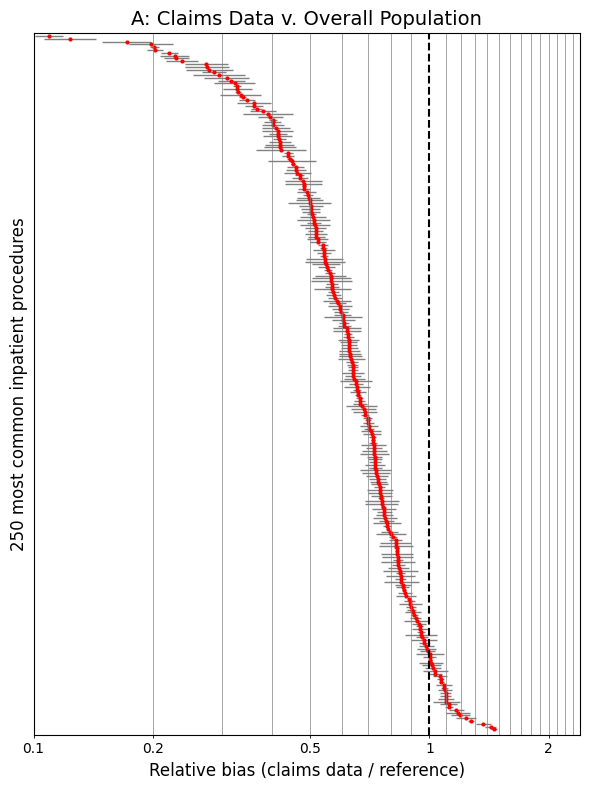

In [207]:
plt.figure(figsize=(6,8))

df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].sort_values(by='rel_bias').copy()
# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:101].sort_values(by='rel_bias').copy()
# df_temp = df_procs.copy()
plot_order = df_temp['procedure']

err = np.array([np.array(df_temp['rel_bias']        - df_temp['rel_bias_low'])  ,
                np.array(df_temp['rel_bias_high']   - df_temp['rel_bias'])   ])

plt.scatter(df_temp['rel_bias'],df_temp['procedure'],  s=4, zorder=2,
             color='red')
plt.barh(df_temp['procedure'], df_temp['rel_bias'], xerr=err, facecolor='none', 
         error_kw=dict(lw=1, capsize=0, capthick=0, ecolor='gray'), zorder=1)


plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel('Relative bias (claims data / reference)', fontsize=12)
plt.ylabel('250 most common inpatient procedures', fontsize=12)

plt.title('A: Claims Data v. Overall Population', fontsize=14)


plt.axvline(1,linestyle='--', color='k', lw=1.5)
# plt.axvline(df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0],linestyle=':', color='gray', lw=1)
plt.axvline(.2, color='gray', linewidth=0.5)
plt.axvline(.3, color='gray', linewidth=0.5)
plt.axvline(.4, color='gray', linewidth=0.5)
plt.axvline(.5, color='gray', linewidth=0.5)
plt.axvline(.6, color='gray', linewidth=0.5)
plt.axvline(.7, color='gray', linewidth=0.5)
plt.axvline(.8, color='gray', linewidth=0.5)
plt.axvline(.9, color='gray', linewidth=0.5)
plt.axvline(1.1, color='gray', linewidth=0.5)
plt.axvline(1.2, color='gray', linewidth=0.5)
plt.axvline(1.3, color='gray', linewidth=0.5)
plt.axvline(1.4, color='gray', linewidth=0.5)
plt.axvline(1.5, color='gray', linewidth=0.5)
plt.axvline(1.6, color='gray', linewidth=0.5)
plt.axvline(1.7, color='gray', linewidth=0.5)
plt.axvline(1.8, color='gray', linewidth=0.5)
plt.axvline(1.9, color='gray', linewidth=0.5)
plt.axvline(2.0, color='gray', linewidth=0.5)
plt.axvline(2.1, color='gray', linewidth=0.5)
plt.axvline(2.2, color='gray', linewidth=0.5)
plt.axvline(2.3, color='gray', linewidth=0.5)
plt.axvline(2.4, color='gray', linewidth=0.5)
plt.xlim([0.1, 2.4])

plt.ylim([251, -1])

ax = plt.gca()
locs = np.array([.1, 0.2, 0.5,  1, 2, 5, 10])
labels = np.array(['0.1', '0.2', '0.5', '1', '2', '5','10'])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

plt.tight_layout()
plt.savefig('temp_whole.jpg', dpi = 800)

In [208]:
plot_order

275    Pharmacotherapy for mental health (excluding s...
126                        Mental health procedures, NEC
165                   Subcutaneous contraceptive implant
67                                  Cardiac stress tests
13                                          Hemodialysis
                             ...                        
283    Prostate and seminal vesicle procedures (exclu...
45                                      Hip arthroplasty
27                                         Prostatectomy
229          Gastro-jejunal bypass (including bariatric)
55                                     Knee arthroplasty
Name: procedure, Length: 250, dtype: object

In [211]:
rate_tbl_all = df_temp[['procedure', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high']]

In [212]:
order_idx = {val: i for i, val in enumerate(plot_order)}

In [213]:
rate_tbl_all

,procedure,rate_SID,rel_bias,rel_bias_low,rel_bias_high
275,Pharmacotherapy for mental health (excluding s...,0.045622,0.109457,0.101112,0.118491
126,"Mental health procedures, NEC",0.010967,0.123709,0.106249,0.144040
165,Subcutaneous contraceptive implant,0.009041,0.171753,0.148983,0.198004
67,Cardiac stress tests,0.009405,0.198133,0.174007,0.225604
13,Hemodialysis,0.229241,0.201507,0.196320,0.206831
...,...,...,...,...,...
283,Prostate and seminal vesicle procedures (exclu...,0.006956,1.237178,1.164537,1.314350
45,Hip arthroplasty,0.085960,1.271115,1.249710,1.292886
27,Prostatectomy,0.012591,1.367712,1.310429,1.427499
229,Gastro-jejunal bypass (including bariatric),0.023363,1.428356,1.385120,1.472942


# commercial cohort

In [258]:
df

,Unnamed: 0,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,...,Perineal muscle laceration repair (2nd degree obstetrical and other),Heart valve replacement and other valve procedures (non-endovascular),"Lower GI therapeutic procedures, NEC (excluding open and laparoscopic)",Placement of tunneled or implantable portion of a vascular access device,Peripheral nerve decompression (excluding lumbosacral and cervicothoracic),Angioplasty and related vessel procedures (endovascular; excluding carotid),"ENT excision (excluding nasal passage, sinuses, tongue, salivary glands, larynx)","Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells","Embolectomy, endarterectomy, and related vessel procedures (non-endovascular; excluding carotid)",Overall Inpatient Visits
0,0,13820,41,1149440,5279.530,0.518941,0.635148,0.287359,0.044257,0.014080,...,0.299106,0.038937,0.003540,0.035397,0.014159,0.028318,0.003540,0.001770,0.010619,6.642273
1,1,20020,41,148252,1716.084,0.518765,0.698689,0.236469,0.033585,0.007366,...,0.468752,0.013021,0.000000,0.039063,0.026042,0.039063,0.000000,0.013021,0.013021,6.796904
2,2,0,41,1142642,28989.209,0.511897,0.685226,0.237991,0.047759,0.005439,...,0.239547,0.029258,0.005486,0.031086,0.007314,0.032915,0.005486,0.000000,0.010972,6.493364
3,3,19460,41,152271,1270.283,0.509644,0.758175,0.122335,0.070178,0.005418,...,0.230423,0.012801,0.000000,0.038404,0.012801,0.012801,0.012801,0.000000,0.012801,6.567051
4,4,17980,41,57952,641.170,0.519240,0.460657,0.434118,0.054908,0.008731,...,0.323810,0.092517,0.000000,0.046259,0.000000,0.046259,0.000000,0.000000,0.000000,5.689804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,29404,20,168524,271.844,0.505429,0.758278,0.072239,0.130711,0.015553,...,0.252200,0.016813,0.000000,0.033627,0.000000,0.016813,0.000000,0.016813,0.000000,5.447523
498,499,43100,20,115178,511.527,0.496735,0.842314,0.019240,0.063675,0.057138,...,0.322953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.144565
499,500,0,59,402371,89062.304,0.488027,0.848163,0.005905,0.089905,0.008152,...,0.381746,0.065818,0.013164,0.026327,0.026327,0.013164,0.000000,0.000000,0.000000,6.160593
500,501,16220,59,80333,5340.541,0.497815,0.866892,0.010755,0.084486,0.005801,...,0.236506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059126,0.000000,10.110623


In [259]:
# df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop 18 to 65'] * 100

For the line above, the numerator and denominator need to be updated for each of the insurance subtypes <br>
Census data at the MSA level is used as the denominator for the SID counts

In [260]:
df_temp = df[['MSA', 'EGEOLOC']].copy()
df_temp['Pop Commercially Insured'] = df['Total Pop'] * df['frac_private_insurance'] * (1 - df['frac_over_65'] - df['frac_under_18'])

df_temp = pd.merge(df_temp, 
                  df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'].isin(procedures)],
                  on=['MSA', 'EGEOLOC'])
df_sid = df_temp[['MSA', 'EGEOLOC', 'State Name', 'Pop Commercially Insured']].drop_duplicates()

for proc in procedures:
    df_sid = pd.merge(df_sid, 
                      df_temp[df_temp['PRCCSR DESCRIPTION'] == proc][['MSA', 'EGEOLOC', 'count']], 
                      on=['MSA', 'EGEOLOC'], 
                      how='left')
    df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop Commercially Insured'] * 100
    df_sid.rename(columns={'count': proc}, inplace=True)

In [261]:
# percent of people aged 18-64 who are commercially insured
df[['Total Pop', 'frac_private_insurance', 'frac_over_65', 'frac_under_18']]

,Total Pop,frac_private_insurance,frac_over_65,frac_under_18
0,1149440,0.750647,0.157443,0.230333
1,148252,0.656438,0.182878,0.227768
2,1142642,0.662503,0.185499,0.222468
3,152271,0.735216,0.173441,0.226898
4,57952,0.610124,0.138546,0.244495
...,...,...,...,...
497,168524,0.765335,0.136378,0.232270
498,115178,0.842469,0.174669,0.223159
499,402371,0.761597,0.160568,0.234182
500,80333,0.734071,0.144150,0.241345


In [262]:
df_sid

,MSA,EGEOLOC,State Name,Pop Commercially Insured,Colectomy,ENT repair,Episiotomy,Frenectomy,Skin graft,Thymectomy,...,Perineal muscle laceration repair (2nd degree obstetrical and other),Heart valve replacement and other valve procedures (non-endovascular),"Lower GI therapeutic procedures, NEC (excluding open and laparoscopic)",Placement of tunneled or implantable portion of a vascular access device,Peripheral nerve decompression (excluding lumbosacral and cervicothoracic),Angioplasty and related vessel procedures (endovascular; excluding carotid),"ENT excision (excluding nasal passage, sinuses, tongue, salivary glands, larynx)","Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells","Embolectomy, endarterectomy, and related vessel procedures (non-endovascular; excluding carotid)",Overall Inpatient Visits
0,41940,62,California,1.046895e+06,0.037987,0.007022,0.044450,0.000000,0.006973,0.002102,...,0.502424,0.011345,0.001098,0.015207,0.002531,0.009125,0.001528,0.004776,0.002771,3.463585
1,17020,62,California,8.850501e+04,0.033904,0.005653,0.040641,0.000000,0.006777,0.000000,...,0.350183,0.020330,0.002260,0.013579,0.003387,0.009050,0.000000,0.001128,0.003400,4.760106
2,40900,62,California,1.039224e+06,0.050114,0.007521,0.021458,0.000192,0.006615,0.002594,...,0.398076,0.017965,0.002406,0.020617,0.002210,0.013746,0.001251,0.004825,0.005567,4.202419
3,41884,62,California,9.154342e+05,0.031788,0.008029,0.037631,0.000000,0.006992,0.001639,...,0.475060,0.012071,0.001256,0.013491,0.003004,0.009775,0.001639,0.005899,0.003059,3.293028
4,31084,62,California,4.213001e+06,0.043307,0.006954,0.051311,0.000047,0.010498,0.001334,...,0.293450,0.012722,0.002113,0.025254,0.003553,0.013725,0.002882,0.004288,0.003448,4.168102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,35614,11,New Jersey,1.952443e+06,0.054372,0.005857,0.084167,0.000051,0.011202,0.001057,...,0.326378,0.016038,0.002003,0.024476,0.002507,0.019267,0.001698,0.004923,0.007176,4.581723
71,45940,11,New Jersey,1.779933e+05,0.053282,0.006808,0.032716,0.000000,0.007088,0.000562,...,0.304311,0.007656,0.002234,0.026575,0.001124,0.022875,0.002085,0.003290,0.003168,4.729250
72,36140,11,New Jersey,4.005432e+04,0.082006,0.014788,0.054160,0.000000,0.017094,0.000000,...,0.099291,0.007490,0.000000,0.047053,0.002497,0.024775,0.000000,0.000000,0.012483,4.906992
73,47220,11,New Jersey,5.682570e+04,0.062931,0.008353,0.021379,0.000000,0.031281,0.000000,...,0.173466,0.015950,0.000000,0.045436,0.006971,0.033898,0.001760,0.001692,0.024074,5.790441


In [263]:
df_sid['Overall Inpatient Visits'].sum()

326.3489704635865

In [264]:
(df_sid['Overall Inpatient Visits'] * df_sid['Pop Commercially Insured']).sum()

130039900.00000001

In [265]:
# #for each procedure, estimate the rate in MS and SID

# df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high'])
# ii = 0
# for proc in procedures:
#     df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop Commercially Insured', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
#     rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
#     rate_sid = (df_temp.sid * df_temp['Pop Commercially Insured']).sum() / df_temp['Pop Commercially Insured'].sum()
#     rel_bias = rate_ms / rate_sid
#     ci = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
#     df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, rel_bias * (1 - 1.96 * ci / rate_ms), rel_bias * (1 + 1.96 * ci / rate_ms)]
#     ii += 1

In [266]:
#for each procedure, estimate the rate in MS and SID

df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high', 'ms_low', 'ms_high', 'sid_low', 'sid_high'])
ii = 0
for proc in procedures:
    df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop Commercially Insured', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
    rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
    rate_sid = (df_temp.sid * df_temp['Pop Commercially Insured']).sum() / df_temp['Pop Commercially Insured'].sum()
    rel_bias = rate_ms / rate_sid
    err_rate_ms = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
    err_rate_sid = (rate_sid / df_temp['Pop Commercially Insured'].sum()) ** 0.5
    err_log_rel_bias = ((err_rate_ms / rate_ms)**2 + (err_rate_sid / rate_sid)**2) ** 0.5
    df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, np.exp(np.log(rel_bias) - 1.96 * err_log_rel_bias), np.exp(np.log(rel_bias) + 1.96 * err_log_rel_bias), (rate_ms -1.96 * err_rate_ms), (rate_ms + 1.96 * err_rate_ms), (rate_sid -1.96 * err_rate_sid), (rate_sid + 1.96 * err_rate_sid)]
    ii += 1


In [267]:
df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias.describe()

count    250.000000
mean       1.044663
std        0.250425
min        0.181377
25%        0.921763
50%        1.054793
75%        1.181948
max        1.940416
Name: rel_bias, dtype: float64

In [268]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias, 5)

0.6145573406689254

In [269]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias, 95)

1.4032892308531357

In [270]:
df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0]

1.2499528914612144

In [271]:
df_procs[df_procs.procedure == 'Overall Inpatient Visits']

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high
295,Overall Inpatient Visits,5.401322,4.32122,1.249953,1.246935,1.252978,5.388299,5.414345,4.320478,4.321963


## Order by the same top 250 as in thef irst plot for the second two plots

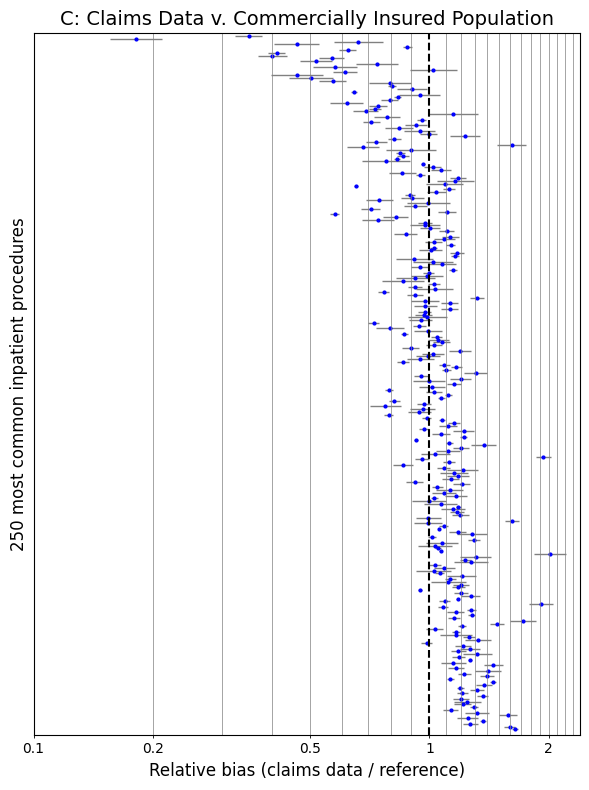

In [272]:
plt.figure(figsize=(6,8))

# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].sort_values(by='rel_bias').copy()
# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:101].sort_values(by='rel_bias').copy()
# df_temp = df_procs.copy()
df_procs['procedure'] = pd.Categorical(df_procs['procedure'], categories=plot_order, ordered=True)
df_temp = df_procs[df_procs.procedure.isin(plot_order)].sort_values(by = 'procedure').copy()


err = np.array([np.array(df_temp['rel_bias']        - df_temp['rel_bias_low'])  ,
                np.array(df_temp['rel_bias_high']   - df_temp['rel_bias'])   ])

plt.scatter(df_temp['rel_bias'],df_temp['procedure'],  s=4, zorder=2,
             color='blue')
plt.barh(df_temp['procedure'], df_temp['rel_bias'], xerr=err, facecolor='none', 
         error_kw=dict(lw=1, capsize=0, capthick=0, ecolor='gray'), zorder=1)


plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel('Relative bias (claims data / reference)', fontsize=12)
plt.ylabel('250 most common inpatient procedures', fontsize=12)

plt.title('C: Claims Data v. Commercially Insured Population', fontsize=14)


plt.axvline(1,linestyle='--', color='k', lw=1.5)
#plt.axvline(df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0],linestyle=':', color='gray', lw=1)
plt.axvline(.2, color='gray', linewidth=0.5)
plt.axvline(.3, color='gray', linewidth=0.5)
plt.axvline(.4, color='gray', linewidth=0.5)
plt.axvline(.5, color='gray', linewidth=0.5)
plt.axvline(.6, color='gray', linewidth=0.5)
plt.axvline(.7, color='gray', linewidth=0.5)
plt.axvline(.8, color='gray', linewidth=0.5)
plt.axvline(.9, color='gray', linewidth=0.5)
plt.axvline(1.1, color='gray', linewidth=0.5)
plt.axvline(1.2, color='gray', linewidth=0.5)
plt.axvline(1.3, color='gray', linewidth=0.5)
plt.axvline(1.4, color='gray', linewidth=0.5)
plt.axvline(1.5, color='gray', linewidth=0.5)
plt.axvline(1.6, color='gray', linewidth=0.5)
plt.axvline(1.7, color='gray', linewidth=0.5)
plt.axvline(1.8, color='gray', linewidth=0.5)
plt.axvline(1.9, color='gray', linewidth=0.5)
plt.axvline(2.0, color='gray', linewidth=0.5)
plt.axvline(2.1, color='gray', linewidth=0.5)
plt.axvline(2.2, color='gray', linewidth=0.5)
plt.axvline(2.3, color='gray', linewidth=0.5)
plt.axvline(2.4, color='gray', linewidth=0.5)
plt.xlim([0.1, 2.4])

plt.ylim([251, -1])

ax = plt.gca()
locs = np.array([.1, 0.2, 0.5,  1, 2, 5, 10])
labels = np.array(['0.1', '0.2', '0.5', '1', '2', '5','10'])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

plt.tight_layout()
plt.savefig('temp_commercially_insured.jpg', dpi = 800)

In [273]:
rate_tbl_com = df_temp[['procedure', 'rate_SID', 'sid_low', 'sid_high', 'rate_MS', 'ms_low', 'ms_high', 'rel_bias', 'rel_bias_low', 'rel_bias_high']]

In [274]:
rate_tbl_com

,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high
275,Pharmacotherapy for mental health (excluding s...,0.014305,0.014263,0.014348,0.004994,0.004598,0.005390,0.349075,0.322446,0.377902
126,"Mental health procedures, NEC",0.007480,0.007449,0.007511,0.001357,0.001150,0.001563,0.181377,0.155773,0.211191
165,Subcutaneous contraceptive implant,0.002349,0.002332,0.002367,0.001553,0.001332,0.001774,0.660974,0.573255,0.762116
67,Cardiac stress tests,0.004034,0.004011,0.004057,0.001863,0.001622,0.002105,0.461920,0.405640,0.526008
13,Hemodialysis,0.052530,0.052448,0.052612,0.046194,0.044989,0.047398,0.879378,0.856708,0.902647
...,...,...,...,...,...,...,...,...,...,...
283,Prostate and seminal vesicle procedures (exclu...,0.006895,0.006866,0.006925,0.008606,0.008086,0.009126,1.248132,1.174796,1.326046
45,Hip arthroplasty,0.080177,0.080076,0.080278,0.109264,0.107412,0.111117,1.362787,1.339817,1.386150
27,Prostatectomy,0.013584,0.013543,0.013626,0.017220,0.016485,0.017956,1.267663,1.214541,1.323110
229,Gastro-jejunal bypass (including bariatric),0.020938,0.020886,0.020990,0.033370,0.032347,0.034394,1.593750,1.545453,1.643557


In [295]:
rate_tbl_com.to_csv('rate_tbl_commercial.csv', index = False)

# all insured

In [276]:
df

,Unnamed: 0,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,...,Perineal muscle laceration repair (2nd degree obstetrical and other),Heart valve replacement and other valve procedures (non-endovascular),"Lower GI therapeutic procedures, NEC (excluding open and laparoscopic)",Placement of tunneled or implantable portion of a vascular access device,Peripheral nerve decompression (excluding lumbosacral and cervicothoracic),Angioplasty and related vessel procedures (endovascular; excluding carotid),"ENT excision (excluding nasal passage, sinuses, tongue, salivary glands, larynx)","Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells","Embolectomy, endarterectomy, and related vessel procedures (non-endovascular; excluding carotid)",Overall Inpatient Visits
0,0,13820,41,1149440,5279.530,0.518941,0.635148,0.287359,0.044257,0.014080,...,0.299106,0.038937,0.003540,0.035397,0.014159,0.028318,0.003540,0.001770,0.010619,6.642273
1,1,20020,41,148252,1716.084,0.518765,0.698689,0.236469,0.033585,0.007366,...,0.468752,0.013021,0.000000,0.039063,0.026042,0.039063,0.000000,0.013021,0.013021,6.796904
2,2,0,41,1142642,28989.209,0.511897,0.685226,0.237991,0.047759,0.005439,...,0.239547,0.029258,0.005486,0.031086,0.007314,0.032915,0.005486,0.000000,0.010972,6.493364
3,3,19460,41,152271,1270.283,0.509644,0.758175,0.122335,0.070178,0.005418,...,0.230423,0.012801,0.000000,0.038404,0.012801,0.012801,0.012801,0.000000,0.012801,6.567051
4,4,17980,41,57952,641.170,0.519240,0.460657,0.434118,0.054908,0.008731,...,0.323810,0.092517,0.000000,0.046259,0.000000,0.046259,0.000000,0.000000,0.000000,5.689804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,29404,20,168524,271.844,0.505429,0.758278,0.072239,0.130711,0.015553,...,0.252200,0.016813,0.000000,0.033627,0.000000,0.016813,0.000000,0.016813,0.000000,5.447523
498,499,43100,20,115178,511.527,0.496735,0.842314,0.019240,0.063675,0.057138,...,0.322953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.144565
499,500,0,59,402371,89062.304,0.488027,0.848163,0.005905,0.089905,0.008152,...,0.381746,0.065818,0.013164,0.026327,0.026327,0.013164,0.000000,0.000000,0.000000,6.160593
500,501,16220,59,80333,5340.541,0.497815,0.866892,0.010755,0.084486,0.005801,...,0.236506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059126,0.000000,10.110623


In [277]:
# df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop 18 to 65'] * 100

For the line above, the numerator and denominator need to be updated for each of the insurance subtypes <br>
Census data at the MSA level is used as the denominator for the SID counts

In [278]:
df_temp = df[['MSA', 'EGEOLOC']].copy()
df_temp['Pop Insured'] = df['Total Pop'] * df['frac_has_insurance'] * (1 - df['frac_over_65'] - df['frac_under_18'])

df_temp = pd.merge(df_temp, 
                  df_sid_counts_insured[df_sid_counts_insured['PRCCSR DESCRIPTION'].isin(procedures)],
                  on=['MSA', 'EGEOLOC'])
df_sid = df_temp[['MSA', 'EGEOLOC', 'State Name', 'Pop Insured']].drop_duplicates()

for proc in procedures:
    df_sid = pd.merge(df_sid, 
                      df_temp[df_temp['PRCCSR DESCRIPTION'] == proc][['MSA', 'EGEOLOC', 'count']], 
                      on=['MSA', 'EGEOLOC'], 
                      how='left')
    df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop Insured'] * 100
    df_sid.rename(columns={'count': proc}, inplace=True)

In [279]:
df_sid

,MSA,EGEOLOC,State Name,Pop Insured,Colectomy,ENT repair,Episiotomy,Frenectomy,Skin graft,Thymectomy,...,Perineal muscle laceration repair (2nd degree obstetrical and other),Heart valve replacement and other valve procedures (non-endovascular),"Lower GI therapeutic procedures, NEC (excluding open and laparoscopic)",Placement of tunneled or implantable portion of a vascular access device,Peripheral nerve decompression (excluding lumbosacral and cervicothoracic),Angioplasty and related vessel procedures (endovascular; excluding carotid),"ENT excision (excluding nasal passage, sinuses, tongue, salivary glands, larynx)","Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells","Embolectomy, endarterectomy, and related vessel procedures (non-endovascular; excluding carotid)",Overall Inpatient Visits
0,41940,62,California,1.205633e+06,0.042236,0.009623,0.044642,0.000000,0.011655,0.002571,...,0.502069,0.014290,0.001618,0.030950,0.003152,0.017961,0.001493,0.005308,0.004604,4.935049
1,17020,62,California,1.272954e+05,0.052655,0.013359,0.051834,0.000784,0.021990,0.000000,...,0.385661,0.027485,0.008629,0.046377,0.005492,0.033765,0.002357,0.003141,0.009442,11.608056
2,40900,62,California,1.330767e+06,0.059627,0.010670,0.026098,0.000150,0.014767,0.002627,...,0.443502,0.021165,0.003622,0.051450,0.004356,0.032315,0.001728,0.005571,0.011582,7.162624
3,41884,62,California,1.051758e+06,0.037698,0.011791,0.038266,0.000000,0.014500,0.001616,...,0.494257,0.015498,0.001759,0.030808,0.003994,0.021535,0.003138,0.005705,0.005847,5.056844
4,31084,62,California,5.651204e+06,0.053038,0.011003,0.077028,0.000053,0.022350,0.001347,...,0.339603,0.015453,0.003822,0.067294,0.006169,0.041227,0.003580,0.005744,0.008054,8.152158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,35614,11,New Jersey,2.264566e+06,0.064053,0.007301,0.092325,0.000044,0.017829,0.001220,...,0.373197,0.020359,0.003316,0.048203,0.003265,0.034752,0.002301,0.005040,0.011442,7.172829
71,45940,11,New Jersey,2.077839e+05,0.063176,0.012089,0.040756,0.000000,0.013285,0.000481,...,0.346281,0.011841,0.003357,0.049282,0.002401,0.044797,0.002748,0.003300,0.008840,7.707667
72,36140,11,New Jersey,4.768437e+04,0.095635,0.012422,0.062271,0.000000,0.024683,0.000000,...,0.124673,0.012583,0.001936,0.062723,0.004194,0.041913,0.000000,0.002097,0.020971,9.210131
73,47220,11,New Jersey,7.590149e+04,0.095533,0.008838,0.027474,0.000000,0.046412,0.001267,...,0.232376,0.021152,0.007436,0.094975,0.007618,0.071144,0.001353,0.002585,0.028338,11.091924


In [280]:
df_sid['Overall Inpatient Visits'].sum()

598.0927372658782

In [281]:
(df_sid['Overall Inpatient Visits'] * df_sid['Pop Insured']).sum()

290822400.00000006

In [282]:
# #for each procedure, estimate the rate in MS and SID

# df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high'])
# ii = 0
# for proc in procedures:
#     df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop Insured', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
#     rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
#     rate_sid = (df_temp.sid * df_temp['Pop Insured']).sum() / df_temp['Pop Insured'].sum()
#     rel_bias = rate_ms / rate_sid
#     ci = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
#     df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, rel_bias * (1 - 1.96 * ci / rate_ms), rel_bias * (1 + 1.96 * ci / rate_ms)]
#     ii += 1

In [283]:
#for each procedure, estimate the rate in MS and SID

df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high', 'ms_low', 'ms_high', 'sid_low', 'sid_high'])
ii = 0
for proc in procedures:
    df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop Insured', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
    rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
    rate_sid = (df_temp.sid * df_temp['Pop Insured']).sum() / df_temp['Pop Insured'].sum()
    rel_bias = rate_ms / rate_sid
    err_rate_ms = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
    err_rate_sid = (rate_sid / df_temp['Pop Insured'].sum()) ** 0.5
    err_log_rel_bias = ((err_rate_ms / rate_ms)**2 + (err_rate_sid / rate_sid)**2) ** 0.5
    df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, np.exp(np.log(rel_bias) - 1.96 * err_log_rel_bias), np.exp(np.log(rel_bias) + 1.96 * err_log_rel_bias), (rate_ms -1.96 * err_rate_ms), (rate_ms + 1.96 * err_rate_ms), (rate_sid -1.96 * err_rate_sid), (rate_sid + 1.96 * err_rate_sid)]
    ii += 1


In [284]:
df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias.describe()

count    250.000000
mean       0.651931
std        0.239385
min        0.105273
25%        0.494193
50%        0.639446
75%        0.796363
max        1.428739
Name: rel_bias, dtype: float64

In [285]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias, 5)

0.2708949652751836

In [286]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].rel_bias, 95)

1.04962899853497

In [287]:
df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0]

0.7031163754768113

In [288]:
df_procs[df_procs.procedure == 'Overall Inpatient Visits']

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high
295,Overall Inpatient Visits,5.401322,7.681974,0.703116,0.701421,0.704816,5.388299,5.414345,7.681092,7.682857


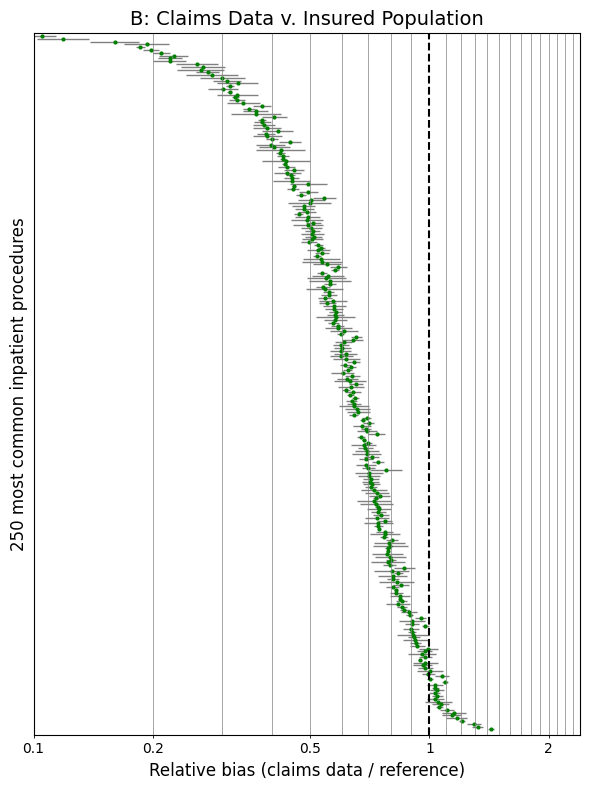

In [289]:
plt.figure(figsize=(6,8))

# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].sort_values(by='rel_bias').copy()
# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:101].sort_values(by='rel_bias').copy()
# df_temp = df_procs.copy()
df_procs['procedure'] = pd.Categorical(df_procs['procedure'], categories=plot_order, ordered=True)
df_temp = df_procs[df_procs.procedure.isin(plot_order)].sort_values(by = 'procedure').copy()

err = np.array([np.array(df_temp['rel_bias']        - df_temp['rel_bias_low'])  ,
                np.array(df_temp['rel_bias_high']   - df_temp['rel_bias'])   ])

plt.scatter(df_temp['rel_bias'],df_temp['procedure'],  s=4, zorder=2,
             color='green')
plt.barh(df_temp['procedure'], df_temp['rel_bias'], xerr=err, facecolor='none', 
         error_kw=dict(lw=1, capsize=0, capthick=0, ecolor='gray'), zorder=1)


plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel('Relative bias (claims data / reference)', fontsize=12)
plt.ylabel('250 most common inpatient procedures', fontsize=12)

plt.title('B: Claims Data v. Insured Population', fontsize=14)


plt.axvline(1,linestyle='--', color='k', lw=1.5)
#plt.axvline(df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0],linestyle=':', color='gray', lw=1)
plt.axvline(.2, color='gray', linewidth=0.5)
plt.axvline(.3, color='gray', linewidth=0.5)
plt.axvline(.4, color='gray', linewidth=0.5)
plt.axvline(.5, color='gray', linewidth=0.5)
plt.axvline(.6, color='gray', linewidth=0.5)
plt.axvline(.7, color='gray', linewidth=0.5)
plt.axvline(.8, color='gray', linewidth=0.5)
plt.axvline(.9, color='gray', linewidth=0.5)
plt.axvline(1.1, color='gray', linewidth=0.5)
plt.axvline(1.2, color='gray', linewidth=0.5)
plt.axvline(1.3, color='gray', linewidth=0.5)
plt.axvline(1.4, color='gray', linewidth=0.5)
plt.axvline(1.5, color='gray', linewidth=0.5)
plt.axvline(1.6, color='gray', linewidth=0.5)
plt.axvline(1.7, color='gray', linewidth=0.5)
plt.axvline(1.8, color='gray', linewidth=0.5)
plt.axvline(1.9, color='gray', linewidth=0.5)
plt.axvline(2.0, color='gray', linewidth=0.5)
plt.axvline(2.1, color='gray', linewidth=0.5)
plt.axvline(2.2, color='gray', linewidth=0.5)
plt.axvline(2.3, color='gray', linewidth=0.5)
plt.axvline(2.4, color='gray', linewidth=0.5)
plt.xlim([0.1, 2.4])

plt.ylim([251, -1])

ax = plt.gca()
locs = np.array([.1, 0.2, 0.5,  1, 2, 5, 10])
labels = np.array(['0.1', '0.2', '0.5', '1', '2', '5','10'])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

plt.tight_layout()
plt.savefig('temp_insured.jpg', dpi = 800)

In [292]:
rate_tbl_insured = df_temp[['procedure', 'rate_SID', 'sid_low', 'sid_high', 'rate_MS', 'ms_low', 'ms_high', 'rel_bias', 'rel_bias_low', 'rel_bias_high']]

In [293]:
rate_tbl_insured

,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high
275,Pharmacotherapy for mental health (excluding s...,0.047435,0.047366,0.047505,0.004994,0.004598,0.005390,0.105273,0.097247,0.113962
126,"Mental health procedures, NEC",0.011443,0.011409,0.011477,0.001357,0.001150,0.001563,0.118565,0.101830,0.138049
165,Subcutaneous contraceptive implant,0.009686,0.009655,0.009718,0.001553,0.001332,0.001774,0.160316,0.139062,0.184819
67,Cardiac stress tests,0.009644,0.009613,0.009675,0.001863,0.001622,0.002105,0.193223,0.169694,0.220013
13,Hemodialysis,0.248293,0.248134,0.248451,0.046194,0.044989,0.047398,0.186045,0.181256,0.190961
...,...,...,...,...,...,...,...,...,...,...
283,Prostate and seminal vesicle procedures (exclu...,0.007349,0.007321,0.007376,0.008606,0.008086,0.009126,1.171133,1.102364,1.244193
45,Hip arthroplasty,0.090568,0.090472,0.090664,0.109264,0.107412,0.111117,1.206437,1.186119,1.227102
27,Prostatectomy,0.013284,0.013247,0.013321,0.017220,0.016485,0.017956,1.296337,1.242038,1.353010
229,Gastro-jejunal bypass (including bariatric),0.025200,0.025149,0.025250,0.033370,0.032347,0.034394,1.324238,1.284151,1.365576


In [296]:
rate_tbl_insured.to_csv('rate_tbl_insured.csv', index = False)

# other stuff

In [97]:
top_proc

,procedure,rate_SID,rel_bias,rel_bias_low,rel_bias_high
275,Pharmacotherapy for mental health (excluding s...,0.045622,0.109457,0.101112,0.118491
126,"Mental health procedures, NEC",0.010967,0.123709,0.106249,0.144040
165,Subcutaneous contraceptive implant,0.009041,0.171753,0.148983,0.198004
67,Cardiac stress tests,0.009405,0.198133,0.174007,0.225604
13,Hemodialysis,0.229241,0.201507,0.196320,0.206831
...,...,...,...,...,...
283,Prostate and seminal vesicle procedures (exclu...,0.006956,1.237178,1.164537,1.314350
45,Hip arthroplasty,0.085960,1.271115,1.249710,1.292886
27,Prostatectomy,0.012591,1.367712,1.310429,1.427499
229,Gastro-jejunal bypass (including bariatric),0.023363,1.428356,1.385120,1.472942


In [98]:
top_proc.to_csv('caterpillar_order_250.csv')

In [267]:
df['Pop Commercially Insured'] = df['Total Pop'] * df['frac_private_insurance'] * (1 - df['frac_over_65'] - df['frac_under_18'])
df['Pop Insured'] = df['Total Pop'] * df['frac_has_insurance'] * (1 - df['frac_over_65'] - df['frac_under_18'])
df['Pop Age 18-64'] = df['Total Pop'] * (1 - df['frac_over_65'] - df['frac_under_18'])
df[['MSA', 'EGEOLOC', 'State Name', 'Total Pop', 'Pop Commercially Insured', 'Pop Insured', 'frac_private_insurance', 'frac_has_insurance', 'Pop Age 18-64', 'frac_over_65', 'frac_under_18']]

,MSA,EGEOLOC,State Name,Total Pop,Pop Commercially Insured,Pop Insured,frac_private_insurance,frac_has_insurance,Pop Age 18-64,frac_over_65,frac_under_18
0,13820,41,Alabama,1149440,528241.298786,609385.730595,0.750647,0.865955,703715.0,0.157443,0.230333
1,20020,41,Alabama,148252,57354.960529,71841.378705,0.656438,0.822238,87373.0,0.182878,0.227768
2,0,41,Alabama,1142642,448171.117592,561281.376070,0.662503,0.829706,676482.0,0.185499,0.222468
3,19460,41,Alabama,152271,67133.338487,77677.689683,0.735216,0.850694,91311.0,0.173441,0.226898
4,17980,41,Alabama,57952,21814.362796,29265.056667,0.610124,0.818511,35754.0,0.138546,0.244495
...,...,...,...,...,...,...,...,...,...,...,...
497,29404,20,Wisconsin,168524,81430.118894,96689.359152,0.765335,0.908752,106398.0,0.136378,0.232270
498,43100,20,Wisconsin,115178,58431.139544,65355.486458,0.842469,0.942306,69357.0,0.174669,0.223159
499,0,59,Wyoming,402371,185475.493610,203995.221830,0.761597,0.837642,243535.0,0.160568,0.234182
500,16220,59,Wyoming,80333,36237.397970,40325.734107,0.734071,0.816889,49365.0,0.144150,0.241345


In [268]:
state_names = ['Iowa', 'New Jersey', 'Maryland', 'California', 'Michigan']
df_states = df[df['State Name'].isin(state_names)].copy()

In [269]:
df_pop_counts = df_states.groupby('State Name')[['Pop Age 18-64', 'Pop Insured', 'Pop Commercially Insured']].sum().reset_index()
df_pop_counts['Percent Insured'] = df_pop_counts['Pop Insured'] / df_pop_counts['Pop Age 18-64']
df_pop_counts['Percent Commercially Insured'] = df_pop_counts['Pop Commercially Insured'] / df_pop_counts['Pop Age 18-64']
df_pop_counts

,State Name,Pop Age 18-64,Pop Insured,Pop Commercially Insured,Percent Insured,Percent Commercially Insured
0,California,24775310.0,2.210535e+07,1.697123e+07,0.892233,0.685006
1,Iowa,1885249.0,1.761293e+06,1.508730e+06,0.934249,0.800282
2,Maryland,3774488.0,3.456054e+06,2.902175e+06,0.915635,0.768892
3,Michigan,6121044.0,5.635005e+06,4.508157e+06,0.920595,0.736501
4,New Jersey,5506697.0,4.900066e+06,4.203032e+06,0.889838,0.763258


In [276]:
df_states['Pop Uninsured'] = df_states['Total Pop'] * df_states['frac_uninsured'] * (1 - df_states['frac_over_65'] - df_states['frac_under_18'])
df_uninsured = df_states[['Pop Age 18-64', 'Pop Uninsured']].sum().reset_index()
df_uninsured = df_uninsured.set_index('index').transpose()
df_uninsured['Percent Uninsured'] = df_uninsured['Pop Uninsured'] / df_uninsured['Pop Age 18-64']
df_uninsured

index,Pop Age 18-64,Pop Uninsured,Percent Uninsured
0,42062788.0,4.131108e+06,0.098213
